# Datathon Cajamar UniversityHack 2022 - Cajamar Water Footprint

## Script Exploración Continuación - Equipo DPNA

En el script anterior hemos:
- Convertido los valores negativos a positivos
- Imputado los valores perdidos a 0 (ya que ocurren siempre en los contadores que no tienen parte decimal)
- Eliminado los minutos y segundos de las horas
- Dejado únicamente una hora para los casos en los que los contadores contaban cada 15 minutos (4 ocurrencias), y algún caso especial con 3 y 5 ocurrencias

En este script:
- Convertir valores decrecitenes de READINGINTEGER a crecientes
- Tratar casos en los que se dan cambios muy drástios

In [171]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')    # Gráficos de mejor calidad

pd.options.display.max_info_rows = 30000000

sns.set_style('darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (15,6)

C:\Users\pablo\AppData\Local\Temp/ipykernel_1800/1655791511.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')    # Gráficos de mejor calidad


In [190]:
df = pd.read_csv('data/Modelar_Procesado.csv', index_col='ID', parse_dates=True)
df['SAMPLETIME'] = pd.to_datetime(df.SAMPLETIME)
df = df.sort_values(["ID", 'SAMPLETIME'])
df.head()

,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
ID,,,,,
0,2019-02-01 00:00:00,331710,0.0,0,0.0
0,2019-02-01 01:00:00,331710,0.0,0,0.0
0,2019-02-01 02:00:00,331710,0.0,0,0.0
0,2019-02-01 03:00:00,331710,0.0,0,0.0
0,2019-02-01 04:00:00,331710,0.0,0,0.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21187597 entries, 0 to 2756
Data columns (total 5 columns):
 #   Column             Non-Null Count     Dtype         
---  ------             --------------     -----         
 0   SAMPLETIME         21187597 non-null  datetime64[ns]
 1   READINGINTEGER     21187597 non-null  int64         
 2   READINGTHOUSANDTH  21187597 non-null  float64       
 3   DELTAINTEGER       21187597 non-null  int64         
 4   DELTATHOUSANDTH    21187597 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1002.1 MB


## Cambiar los valores de READINGINTEGER cuando de una empieza a decrecer

### Visualización

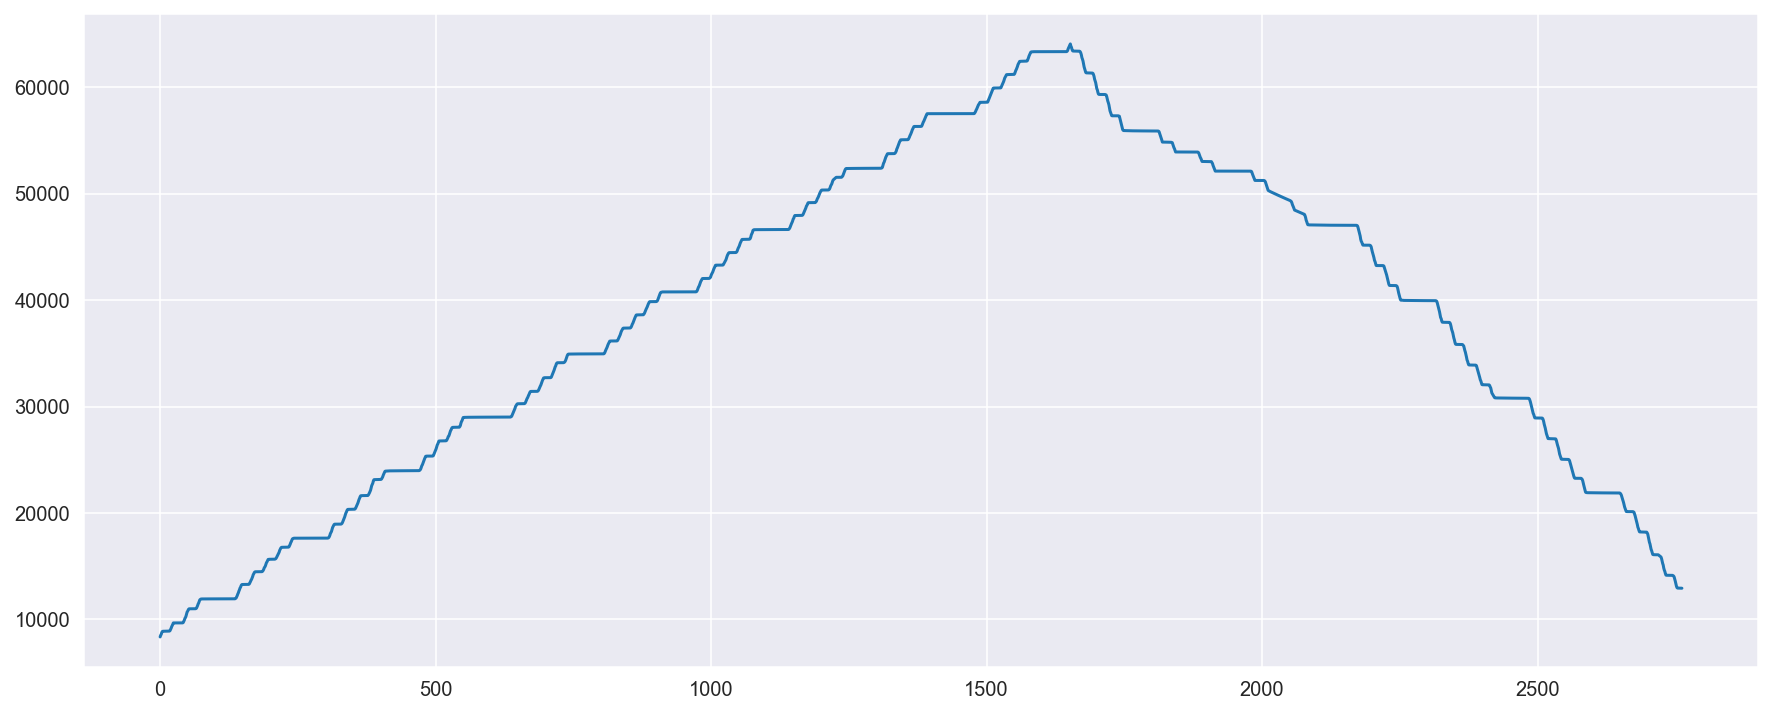

In [79]:
plt.plot(df.loc[2711].sort_values('SAMPLETIME')["READINGINTEGER"].values)

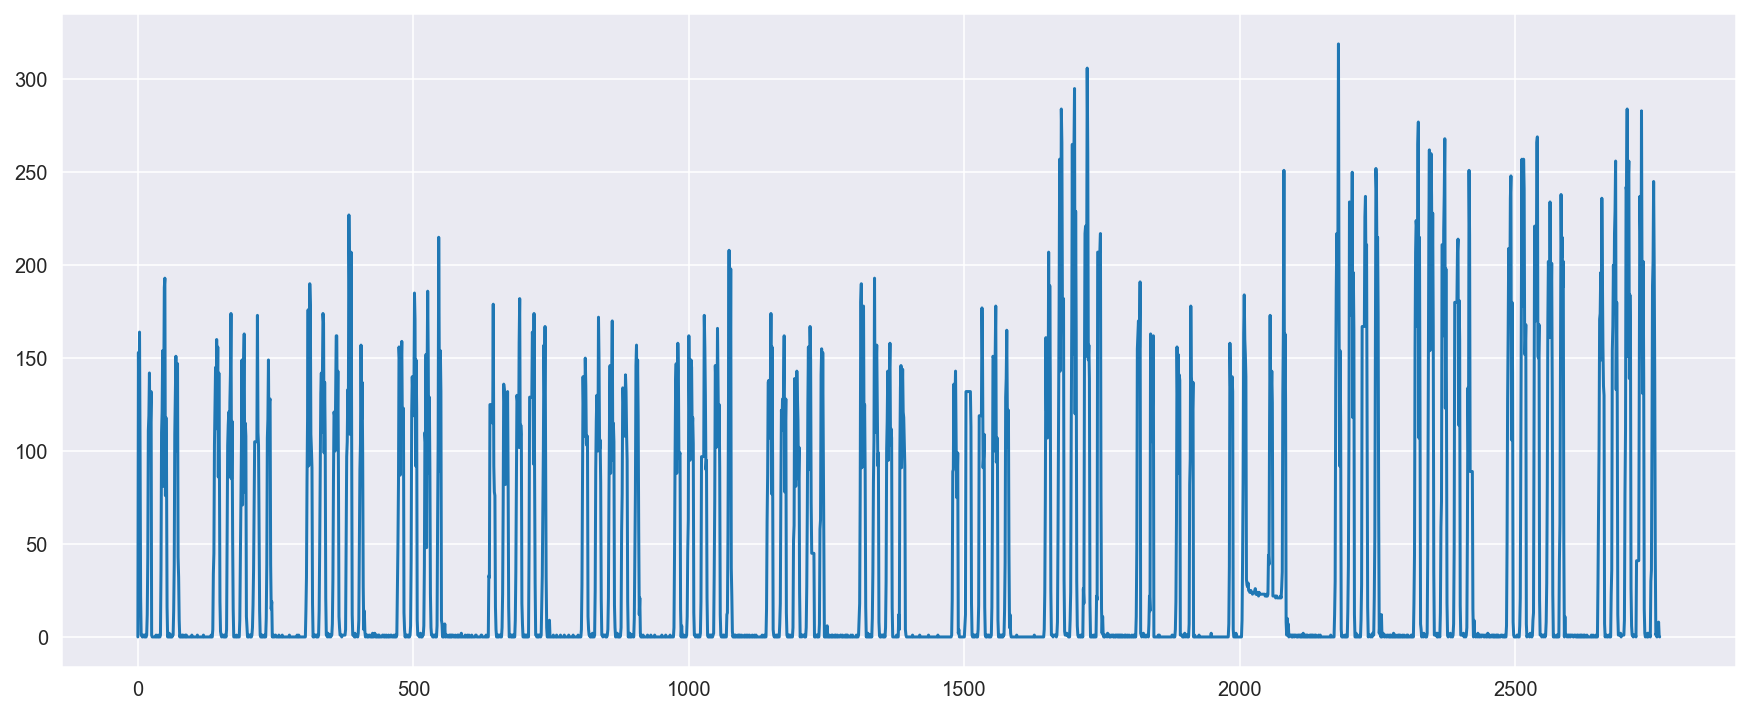

In [114]:
plt.plot(df.loc[2711].sort_values('SAMPLETIME')["DELTAINTEGER"].values)

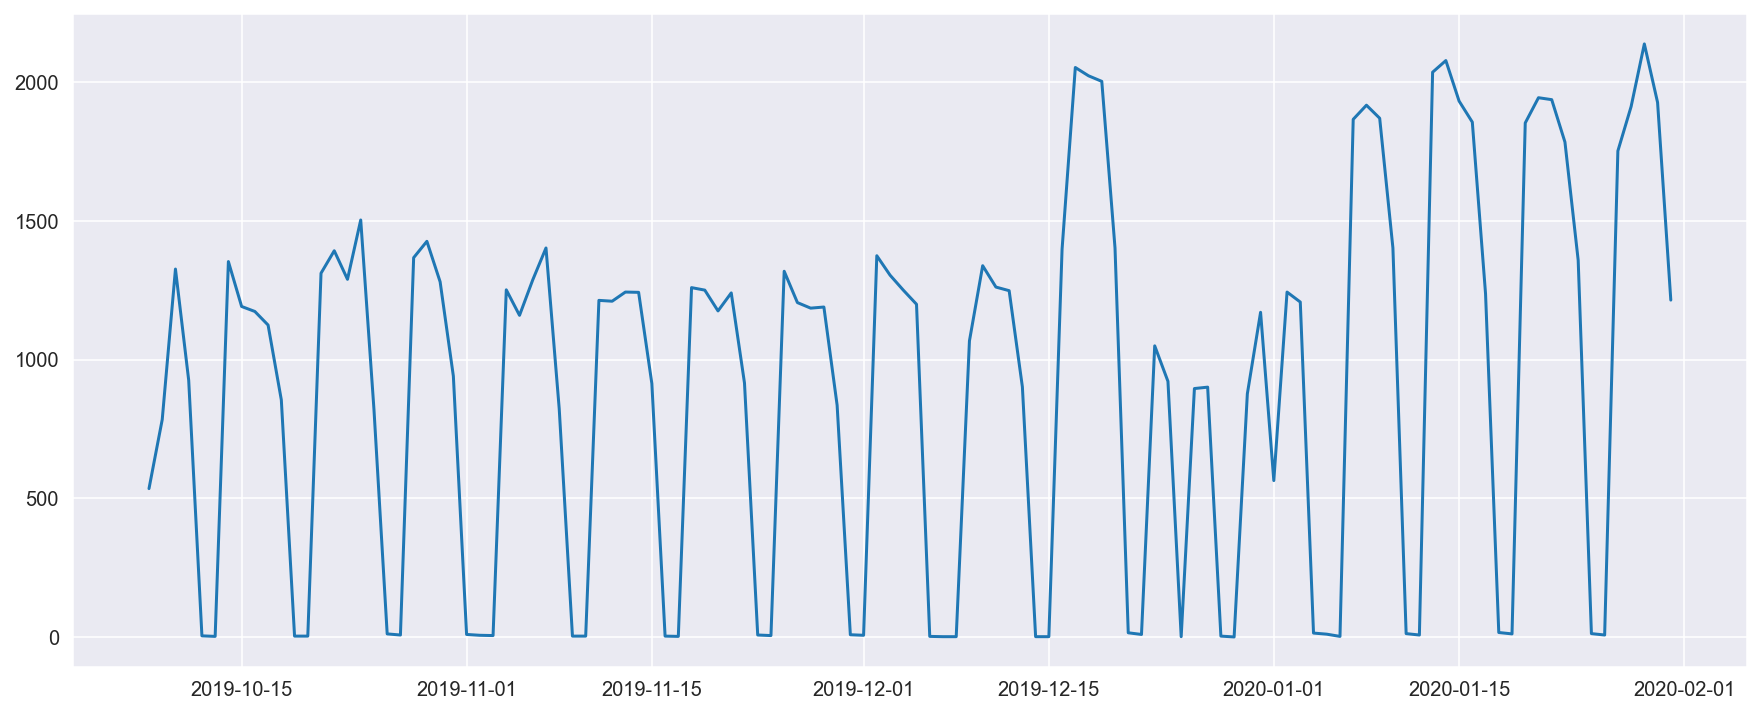

In [121]:
plt.plot(df.loc[2711].resample('D', on='SAMPLETIME').DELTAINTEGER.sum())

In [80]:
df.loc[7].sort_values('SAMPLETIME')[2000:2010]

,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
ID,,,,,
7,2019-04-25 09:00:00,200785,0.0,9,0.0
7,2019-04-25 10:00:00,200785,0.0,0,0.0
7,2019-04-25 11:00:00,200781,0.0,4,0.0
7,2019-04-25 12:00:00,200780,0.0,1,0.0
7,2019-04-25 13:00:00,200779,0.0,1,0.0
7,2019-04-25 14:00:00,200786,0.0,7,0.0
7,2019-04-25 15:00:00,200793,0.0,7,0.0
7,2019-04-25 16:00:00,200800,0.0,7,0.0
7,2019-04-25 17:00:00,200806,0.0,6,0.0


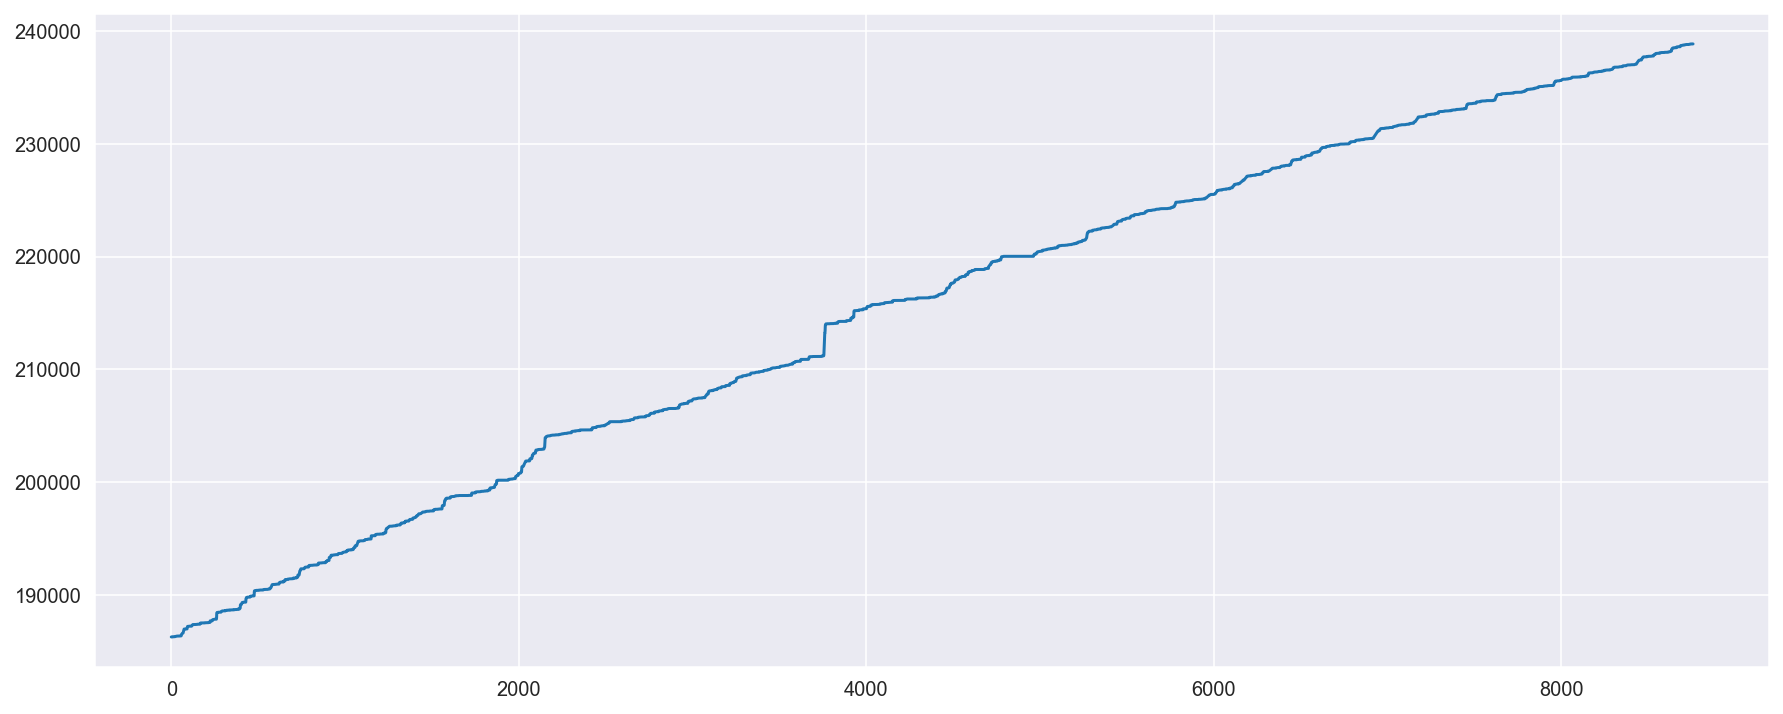

In [109]:
plt.plot(df.loc[7].sort_values('SAMPLETIME')["READINGINTEGER"].values)

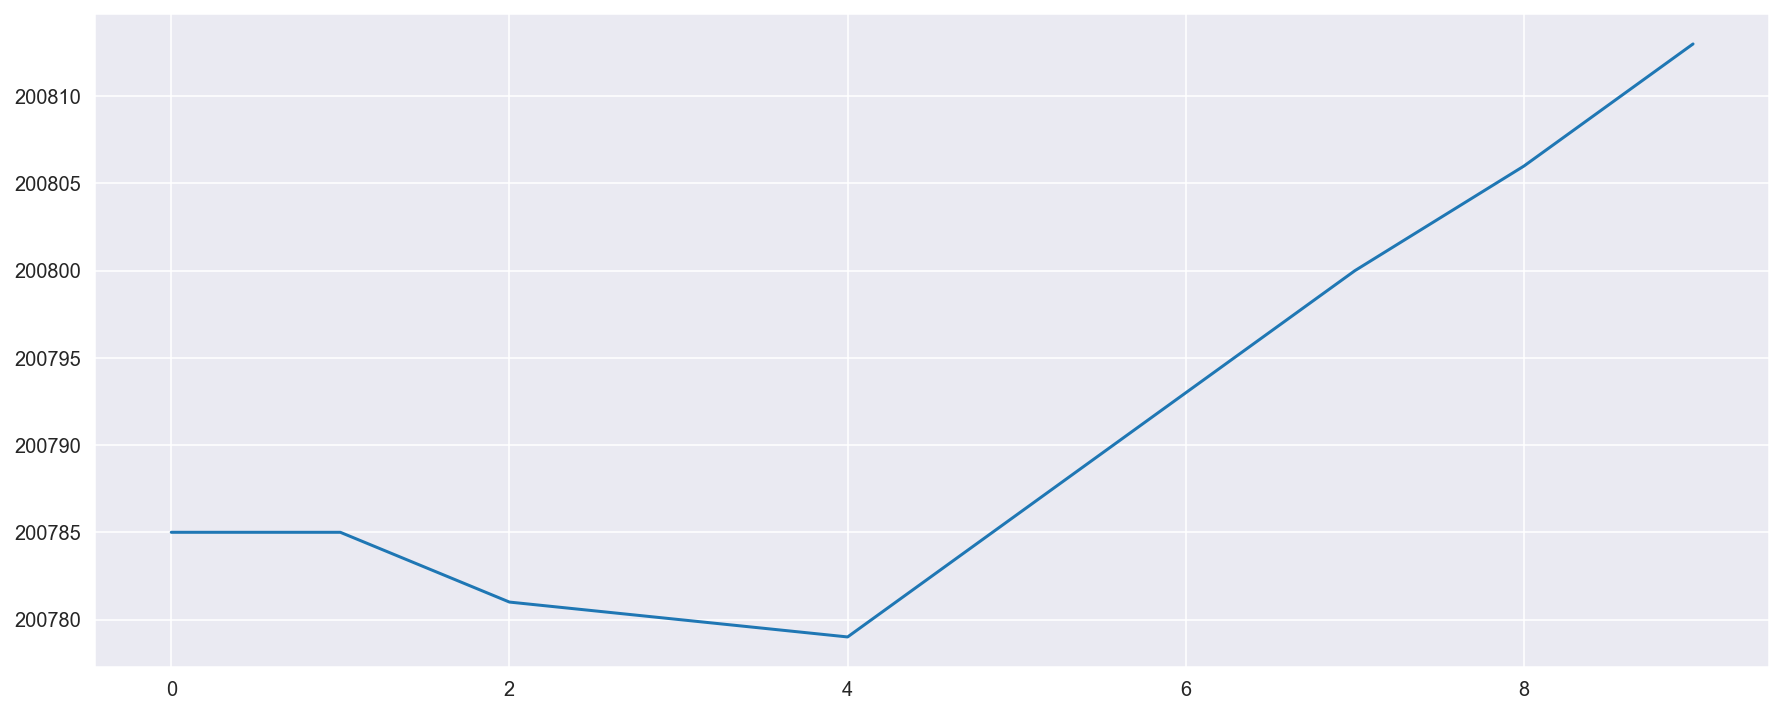

In [81]:
plt.plot(df.loc[7].sort_values('SAMPLETIME')["READINGINTEGER"][2000:2010].values)

In [82]:
df.loc[57].sort_values('SAMPLETIME')[7295:7310]

,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
ID,,,,,
57,2019-12-02 00:00:00,347383,0.0,2,0.0
57,2019-12-02 01:00:00,347386,0.0,3,0.0
57,2019-12-02 02:00:00,347388,0.0,2,0.0
57,2019-12-02 03:00:00,347388,0.0,0,0.0
57,2019-12-02 04:00:00,289541,4.0,57846,6.0
57,2019-12-02 05:00:00,231694,8.0,57846,6.0
57,2019-12-02 06:00:00,173848,2.0,57846,6.0
57,2019-12-02 07:00:00,116001,6.0,57846,6.0
57,2019-12-02 08:00:00,58155,0.0,57846,6.0


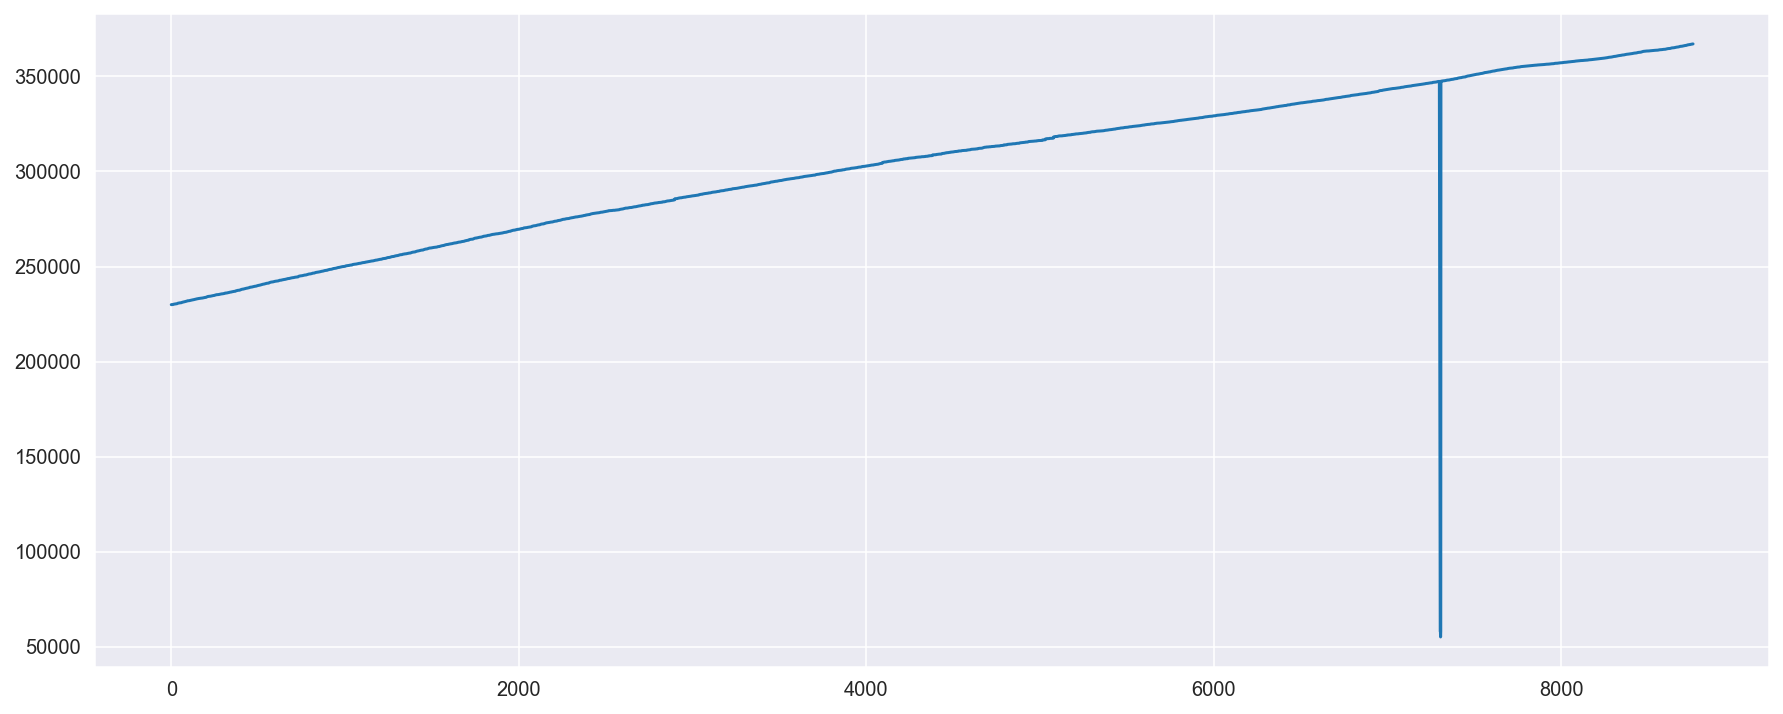

In [108]:
plt.plot(df.loc[57].sort_values('SAMPLETIME')["READINGINTEGER"].values)

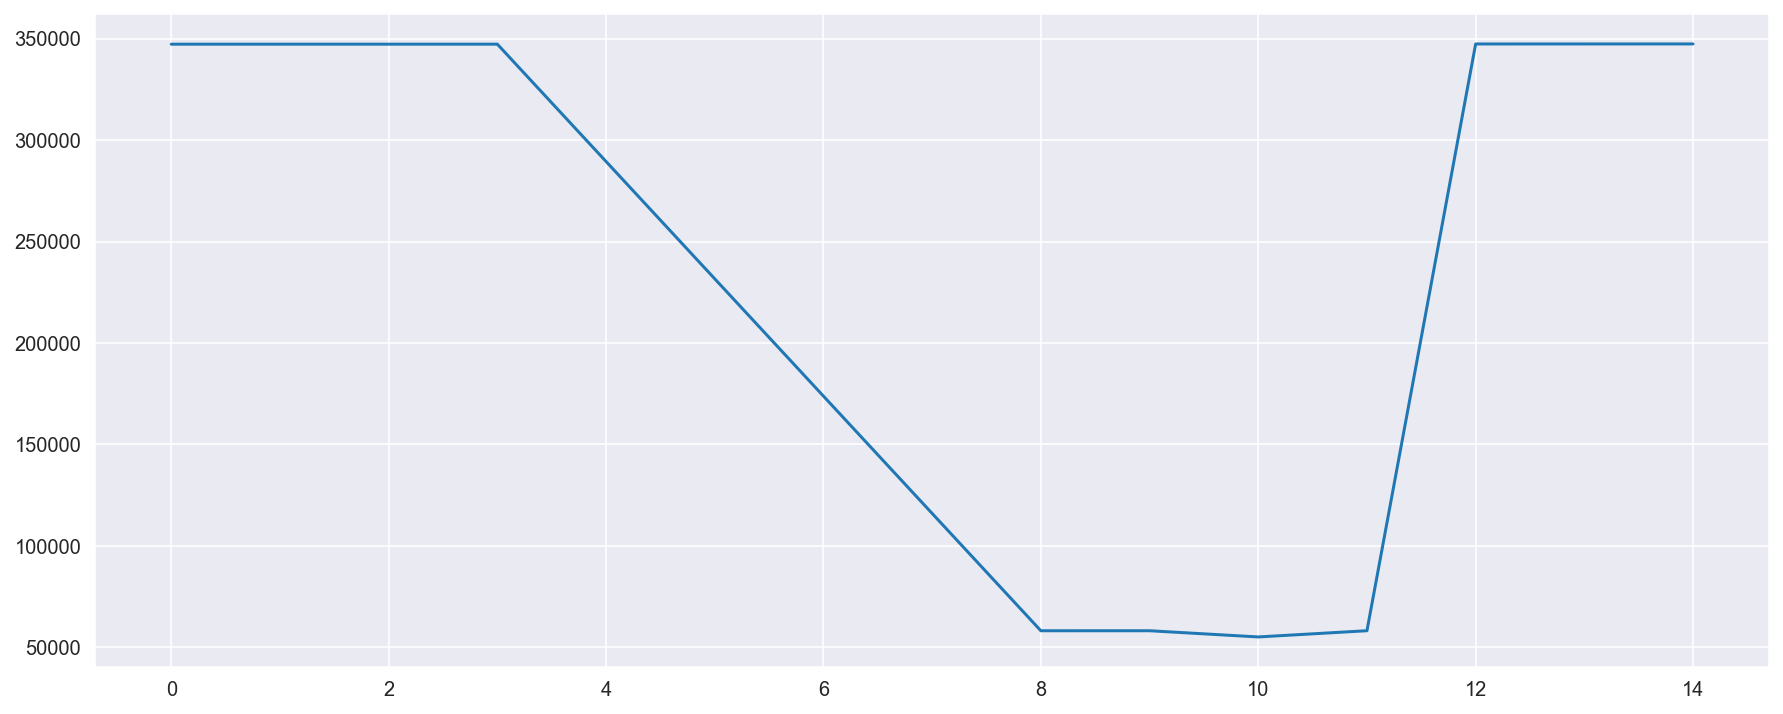

In [83]:
plt.plot(df.loc[57].sort_values('SAMPLETIME')["READINGINTEGER"][7295:7310].values)

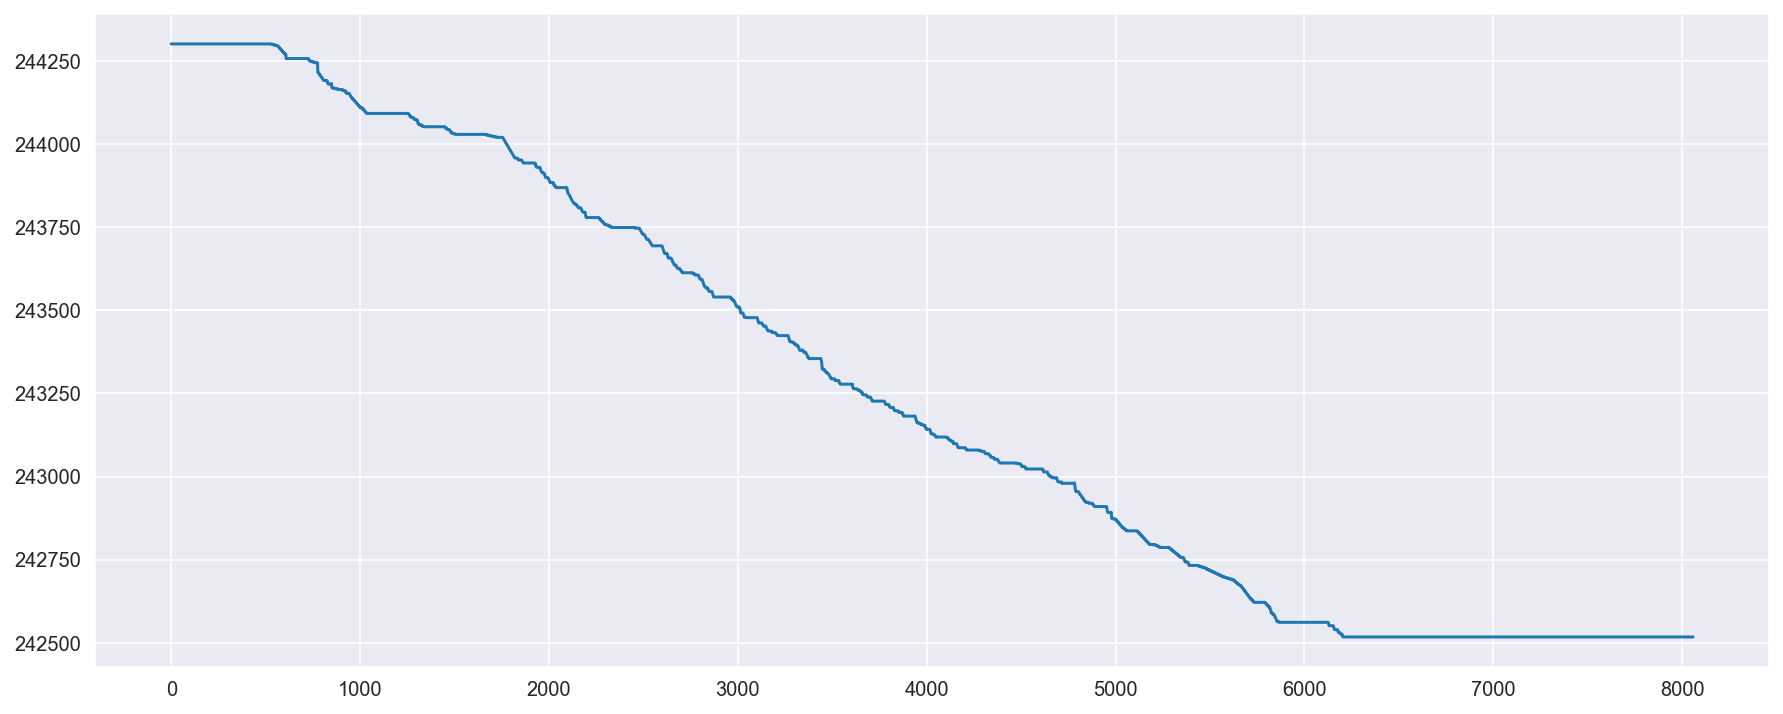

In [84]:
plt.plot(df.loc[138].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

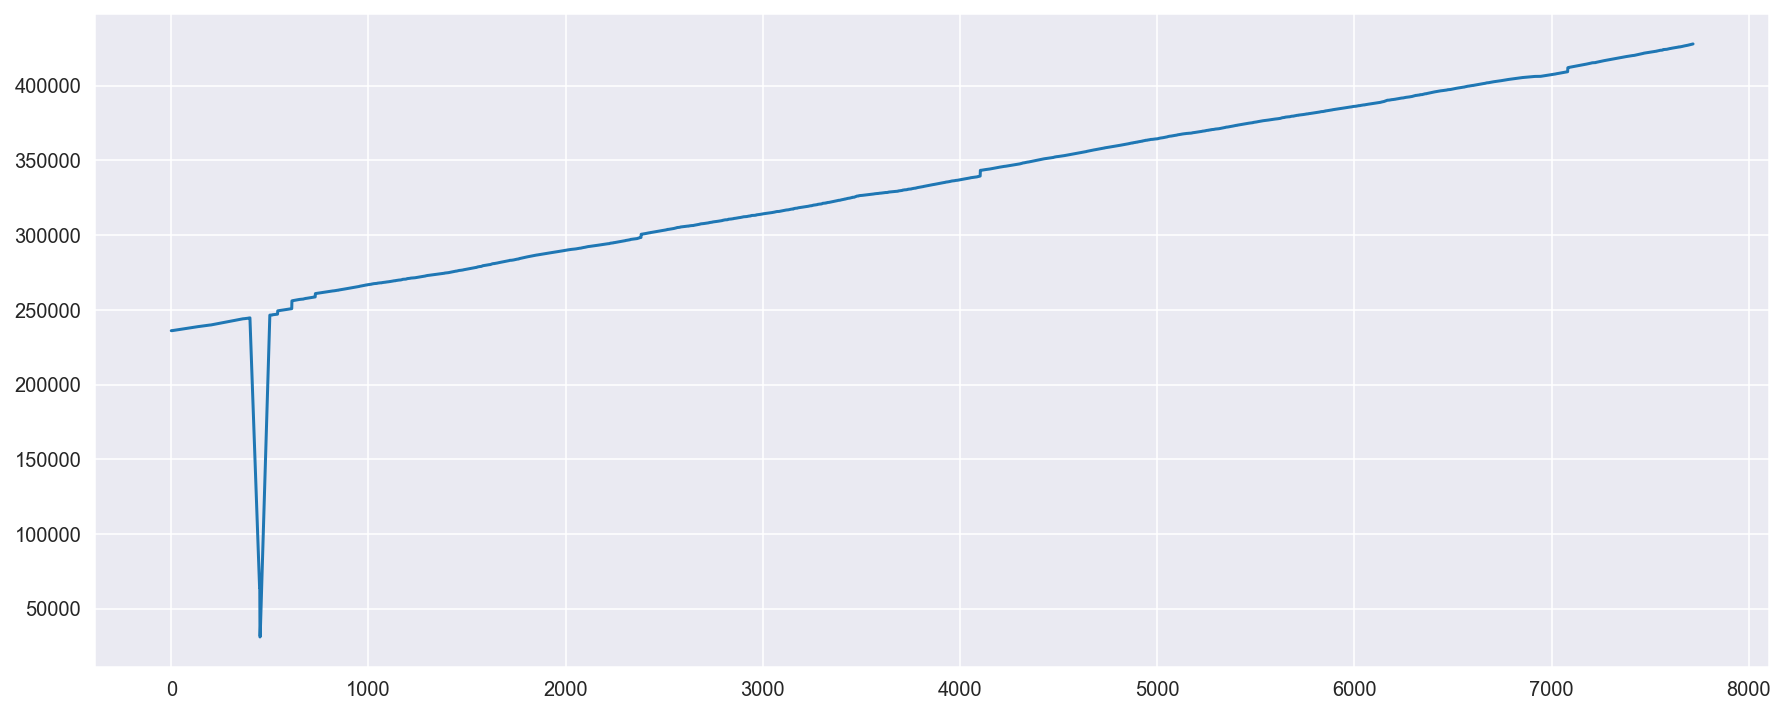

In [85]:
plt.plot(df.loc[493].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

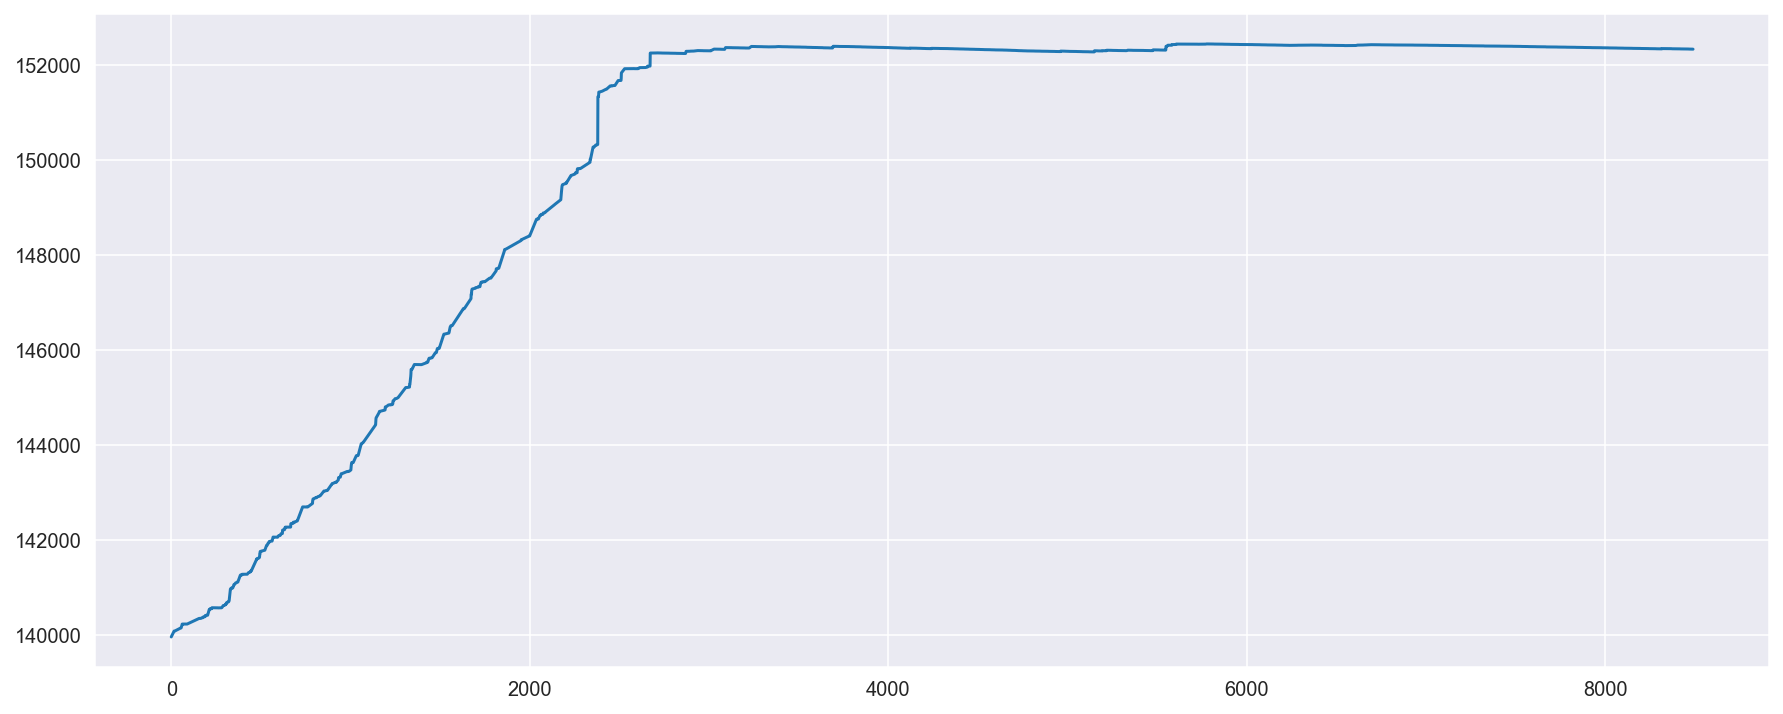

In [86]:
plt.plot(df.loc[794].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

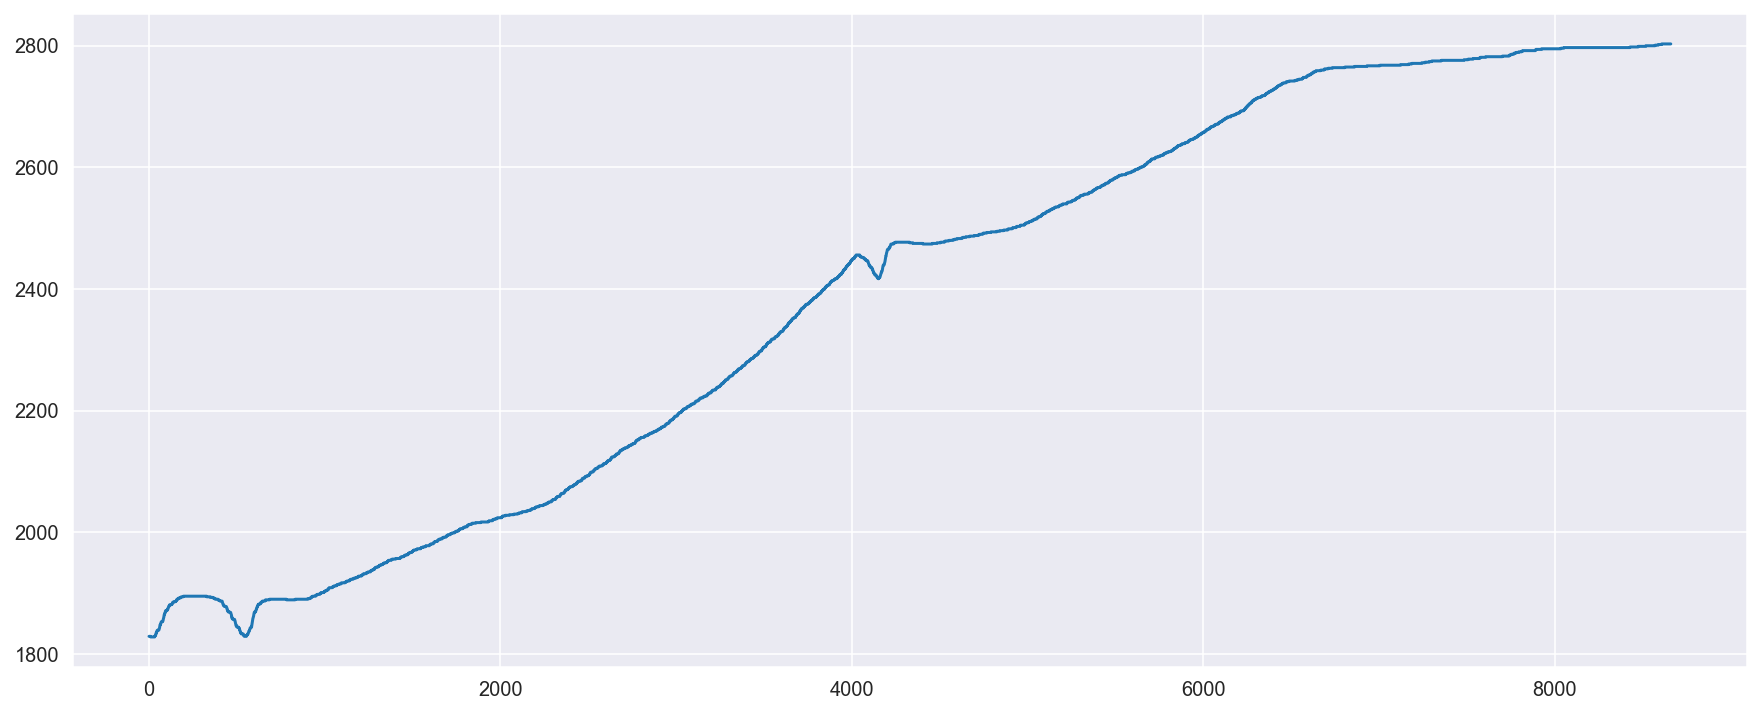

In [87]:
plt.plot(df.loc[896].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

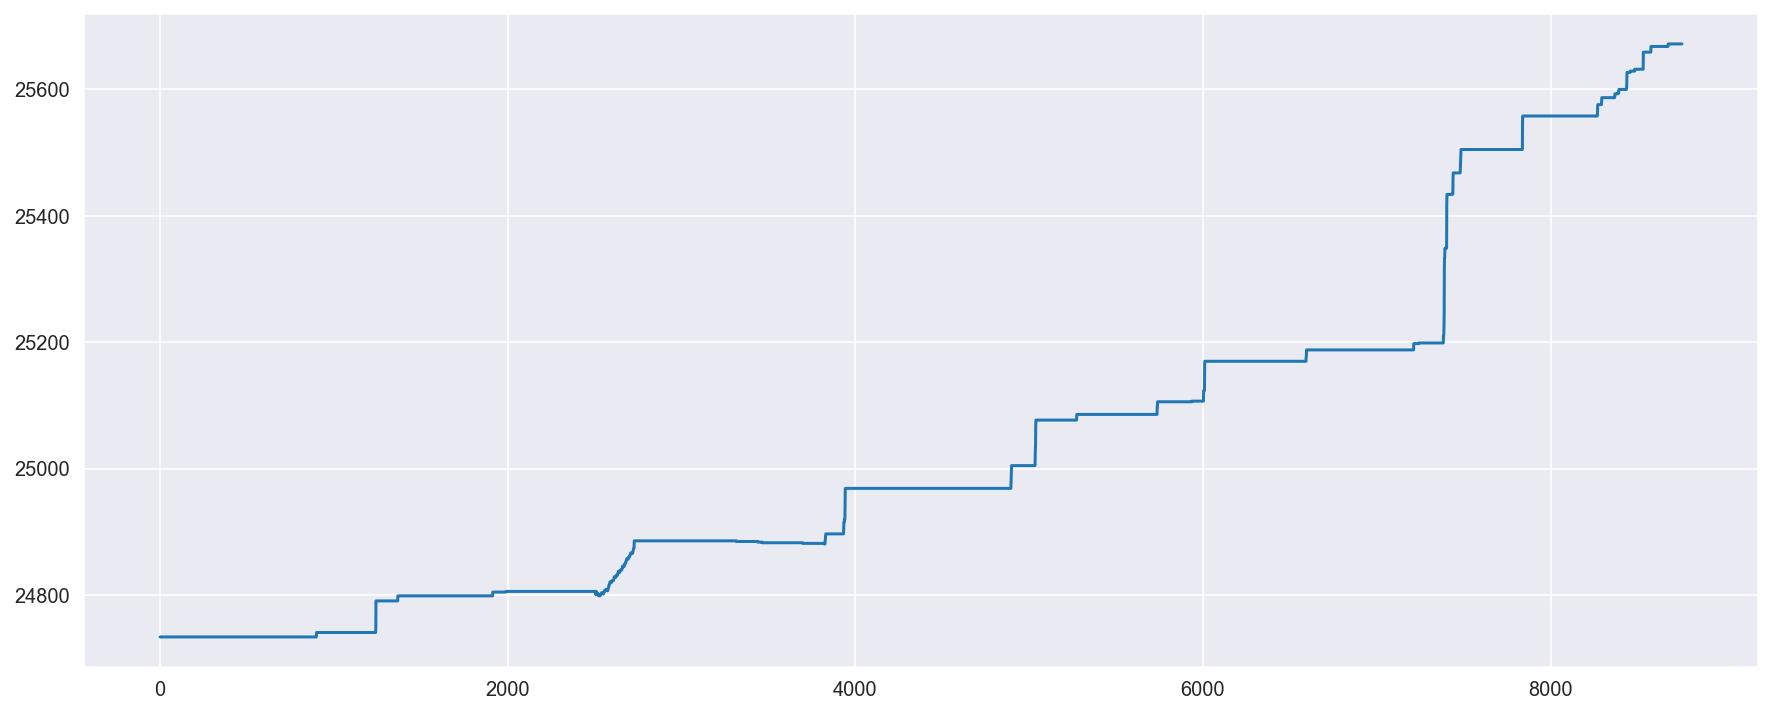

In [88]:
plt.plot(df.loc[977].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

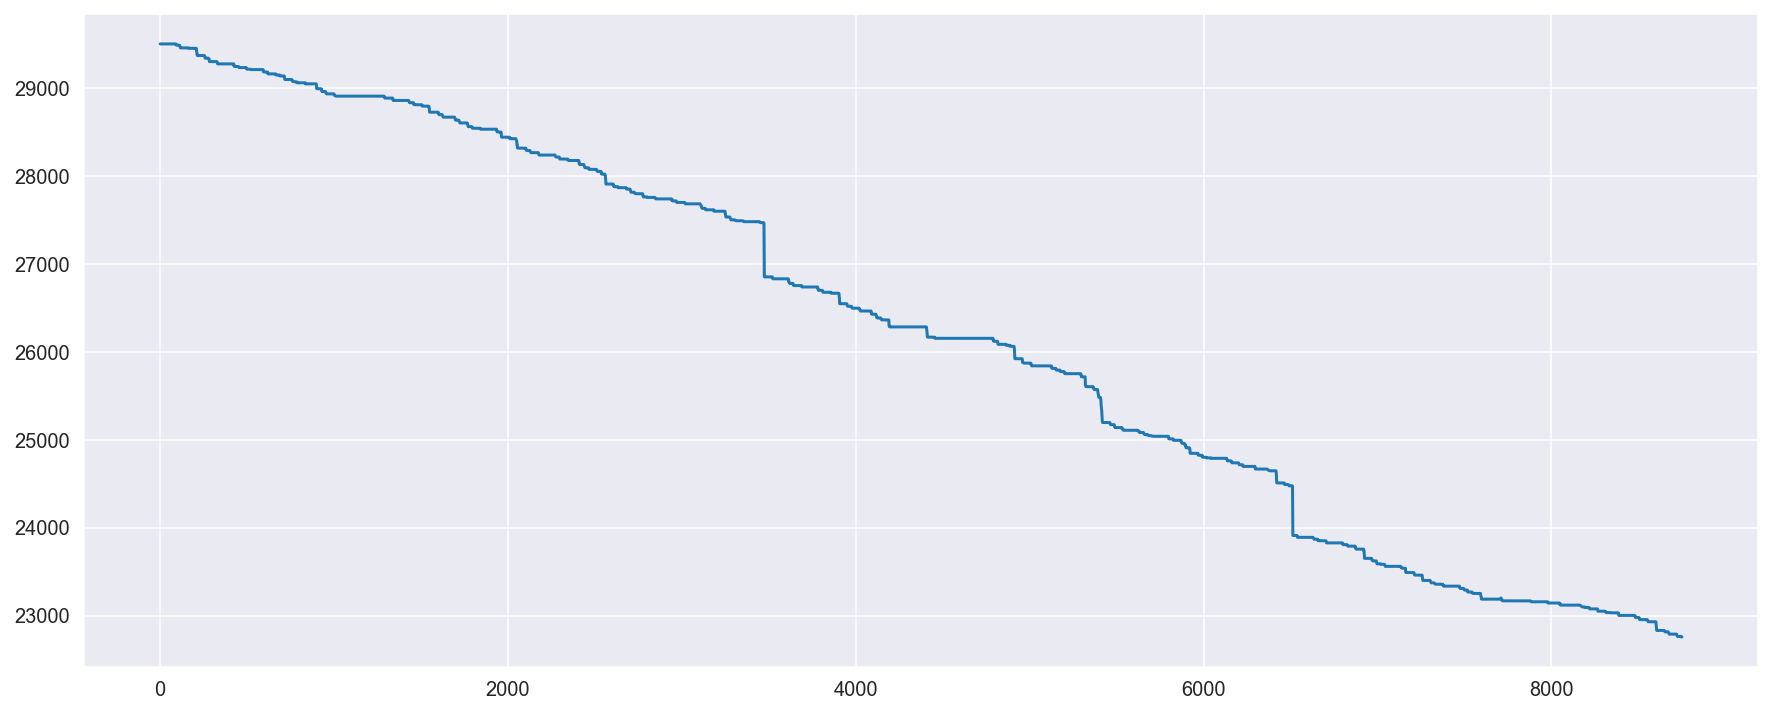

In [89]:
plt.plot(df.loc[1041].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

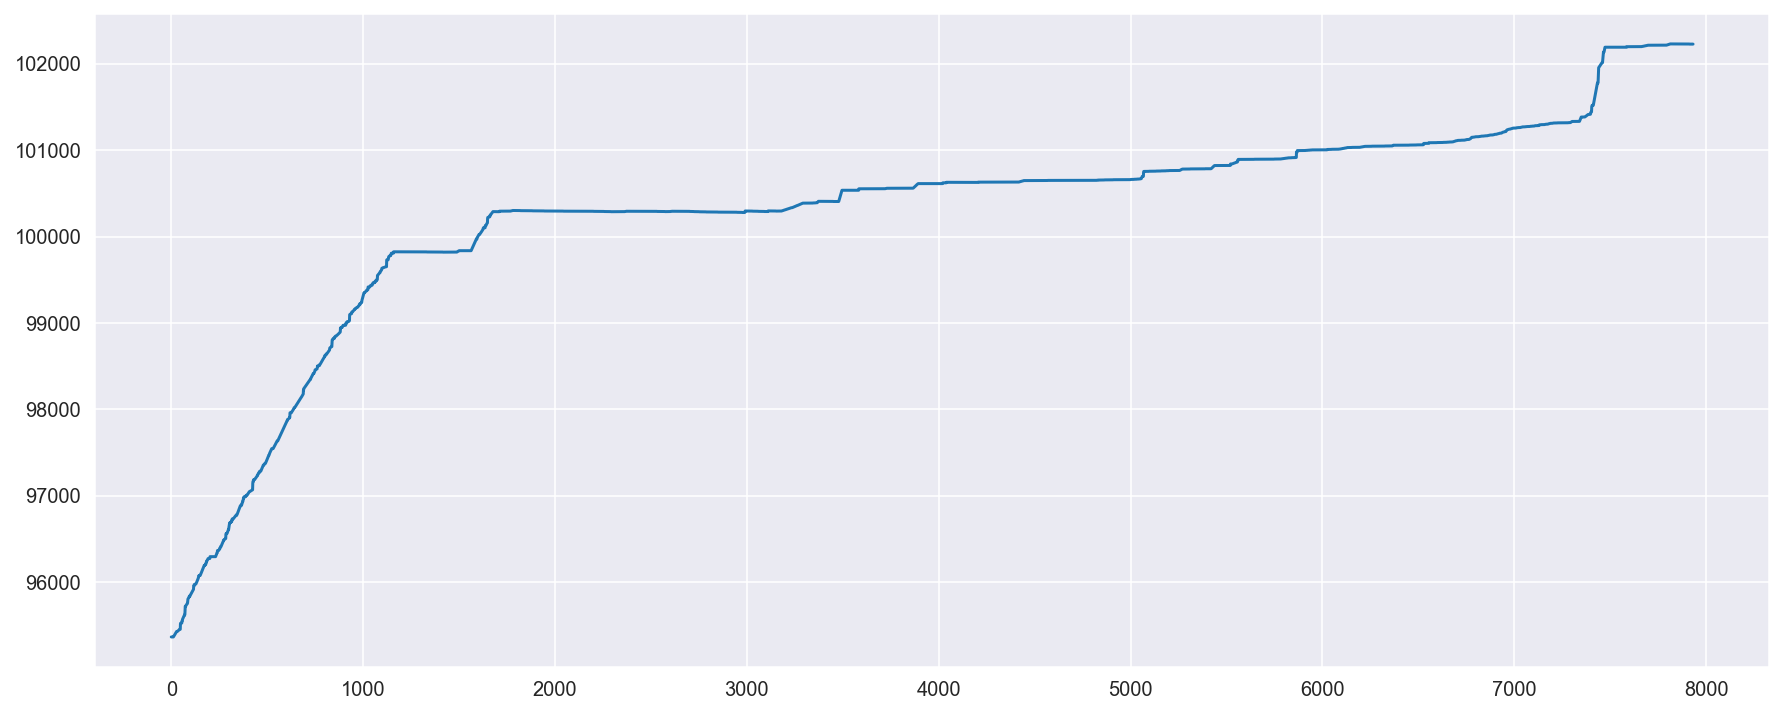

In [90]:
plt.plot(df.loc[1250].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

#### ¿QUÉ?

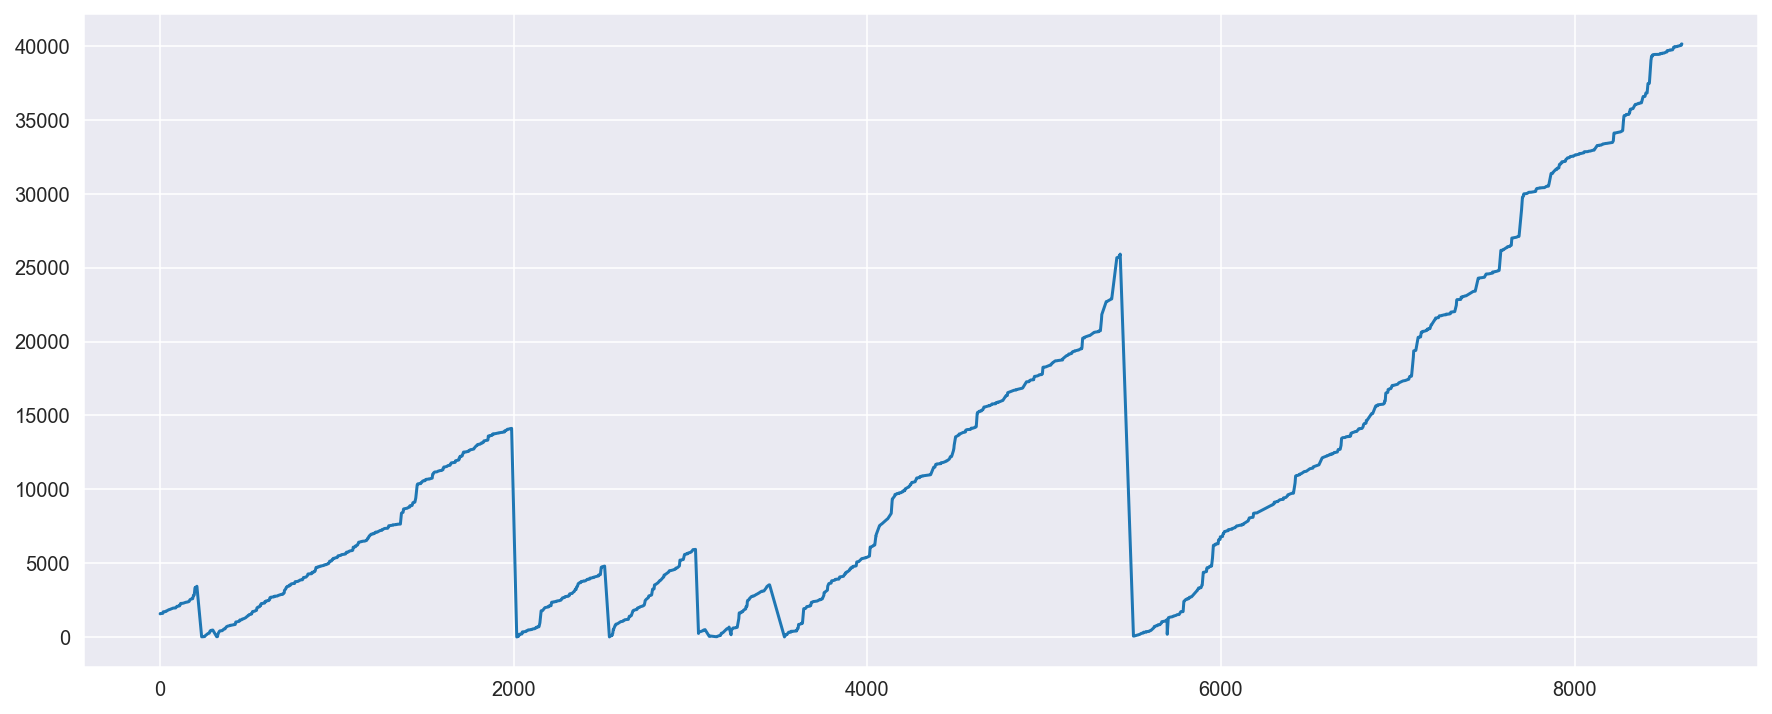

In [91]:
plt.plot(df.loc[1506].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

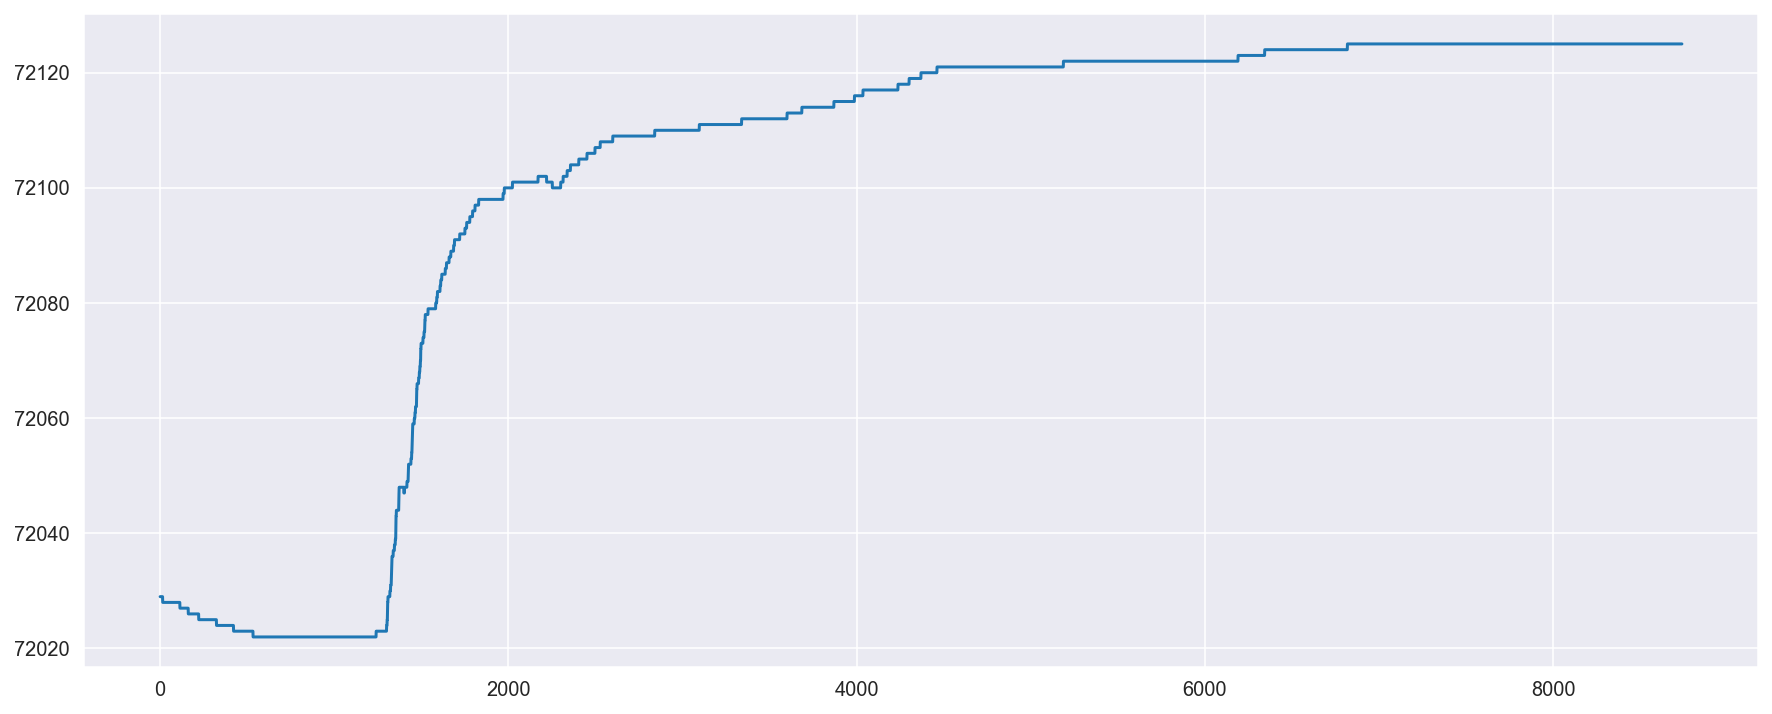

In [92]:
plt.plot(df.loc[1911].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

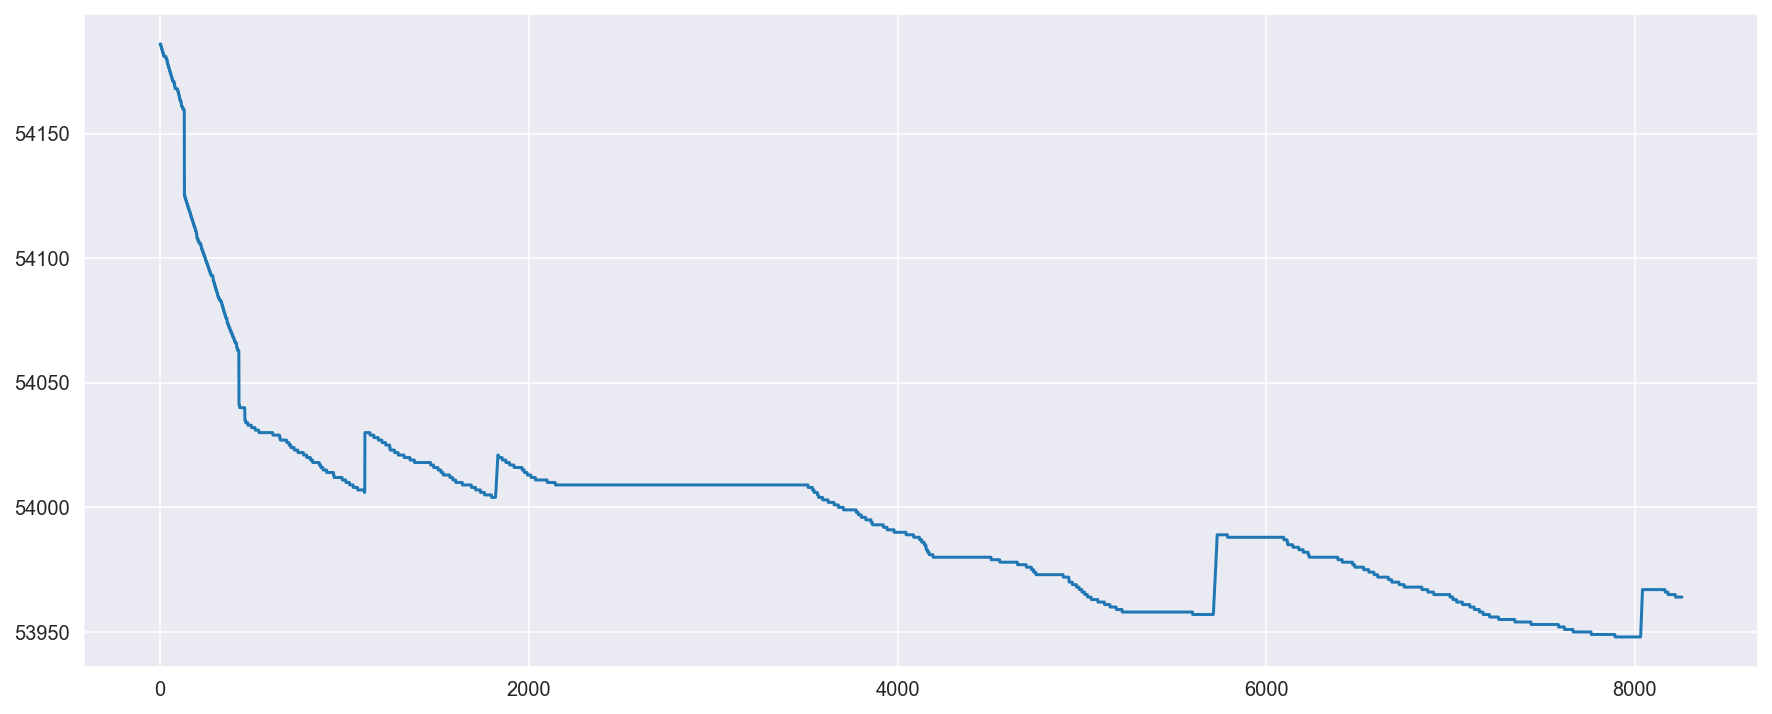

In [93]:
plt.plot(df.loc[2140].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

Cuidado con estos inicios

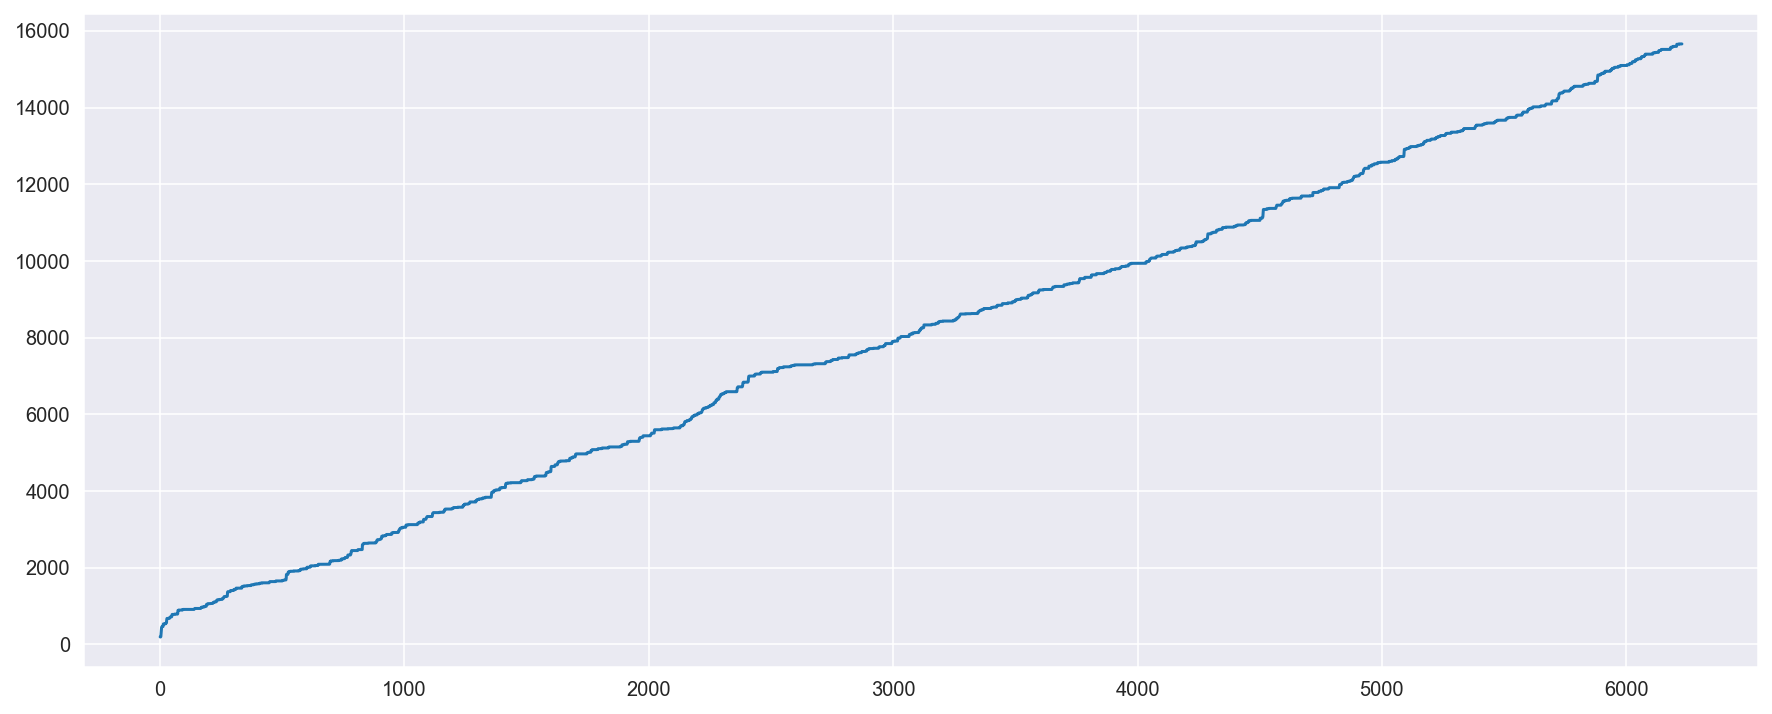

In [95]:
plt.plot(df.loc[1072].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

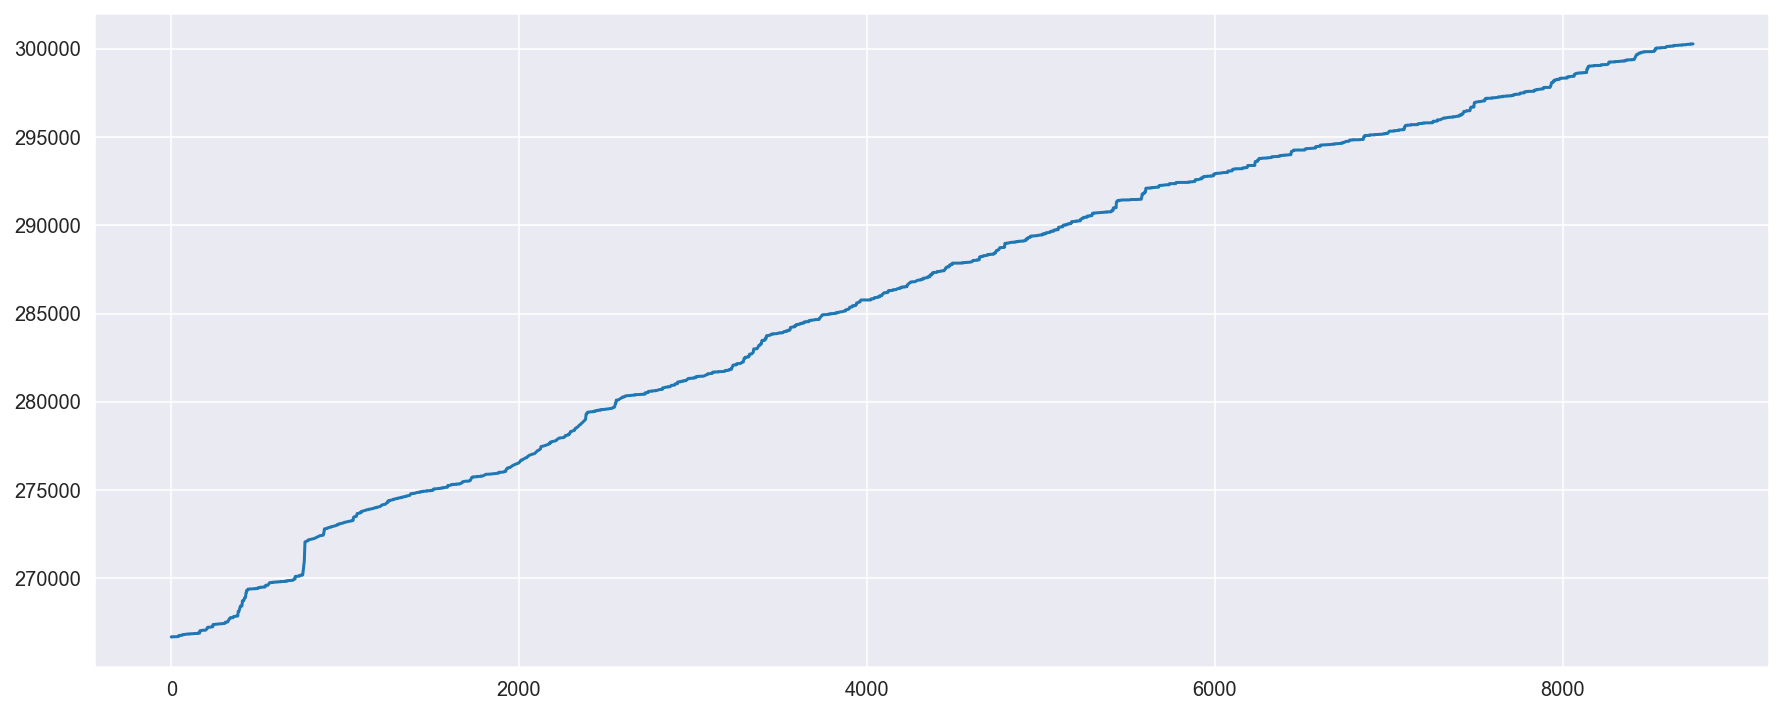

In [96]:
plt.plot(df.loc[1195].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

¿Pueden estar multiplicando los datos por algún valor?

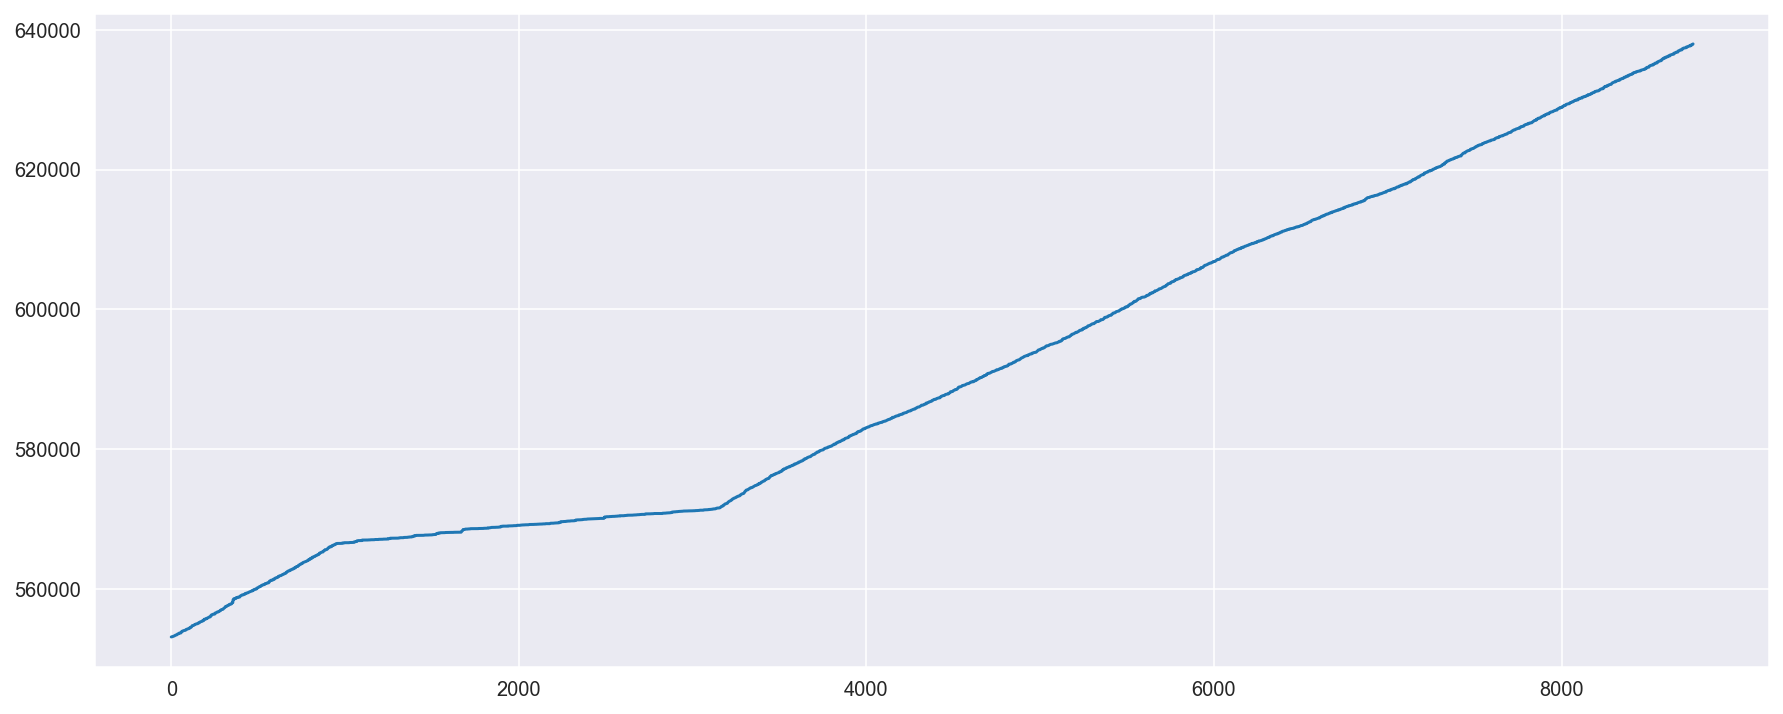

In [97]:
plt.plot(df.loc[1144].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

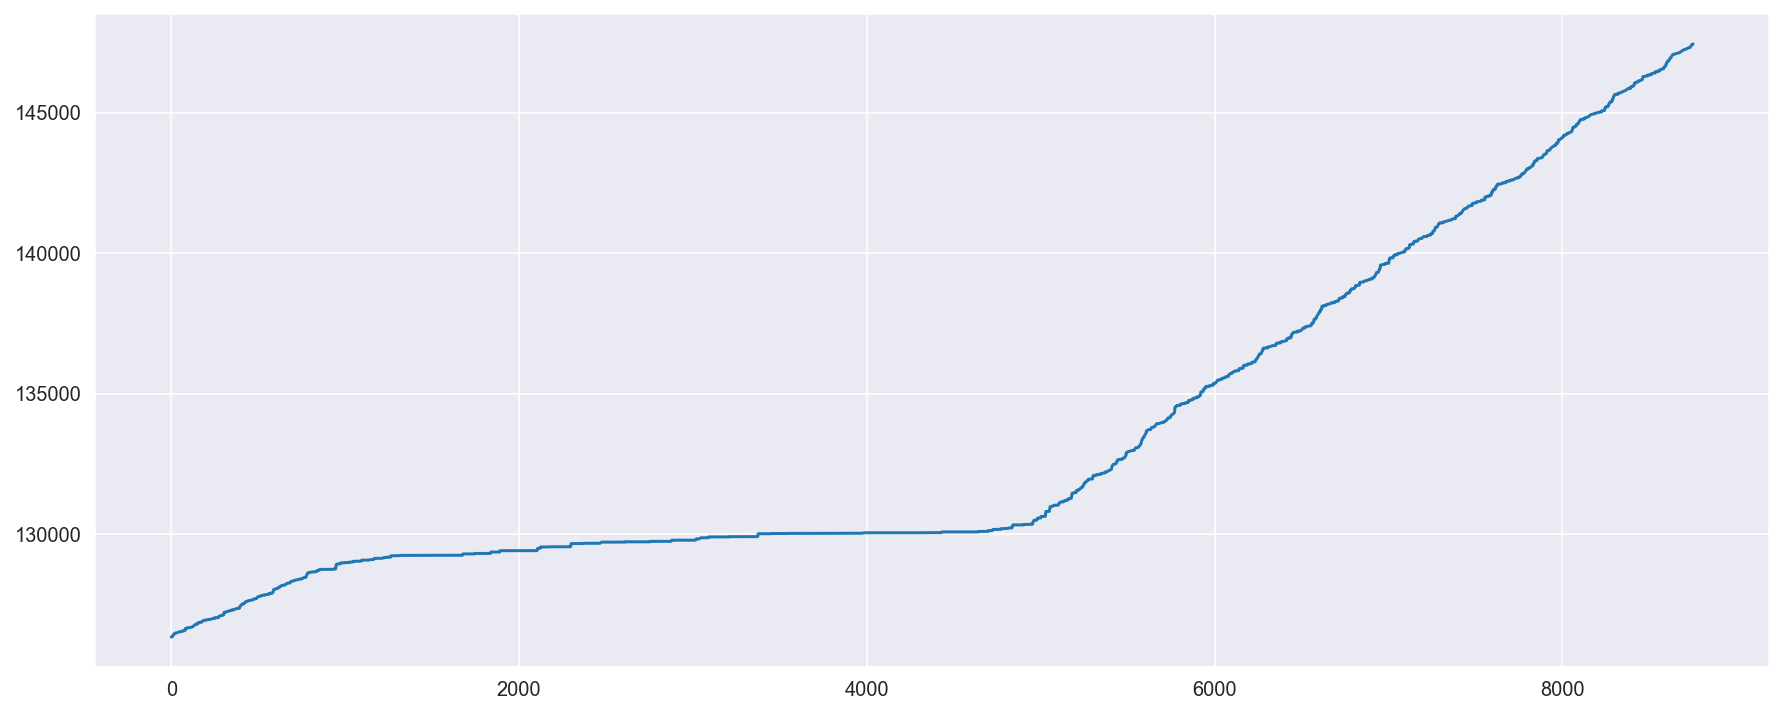

In [98]:
plt.plot(df.loc[1166].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

¿Nos creemos el inicio o el final?

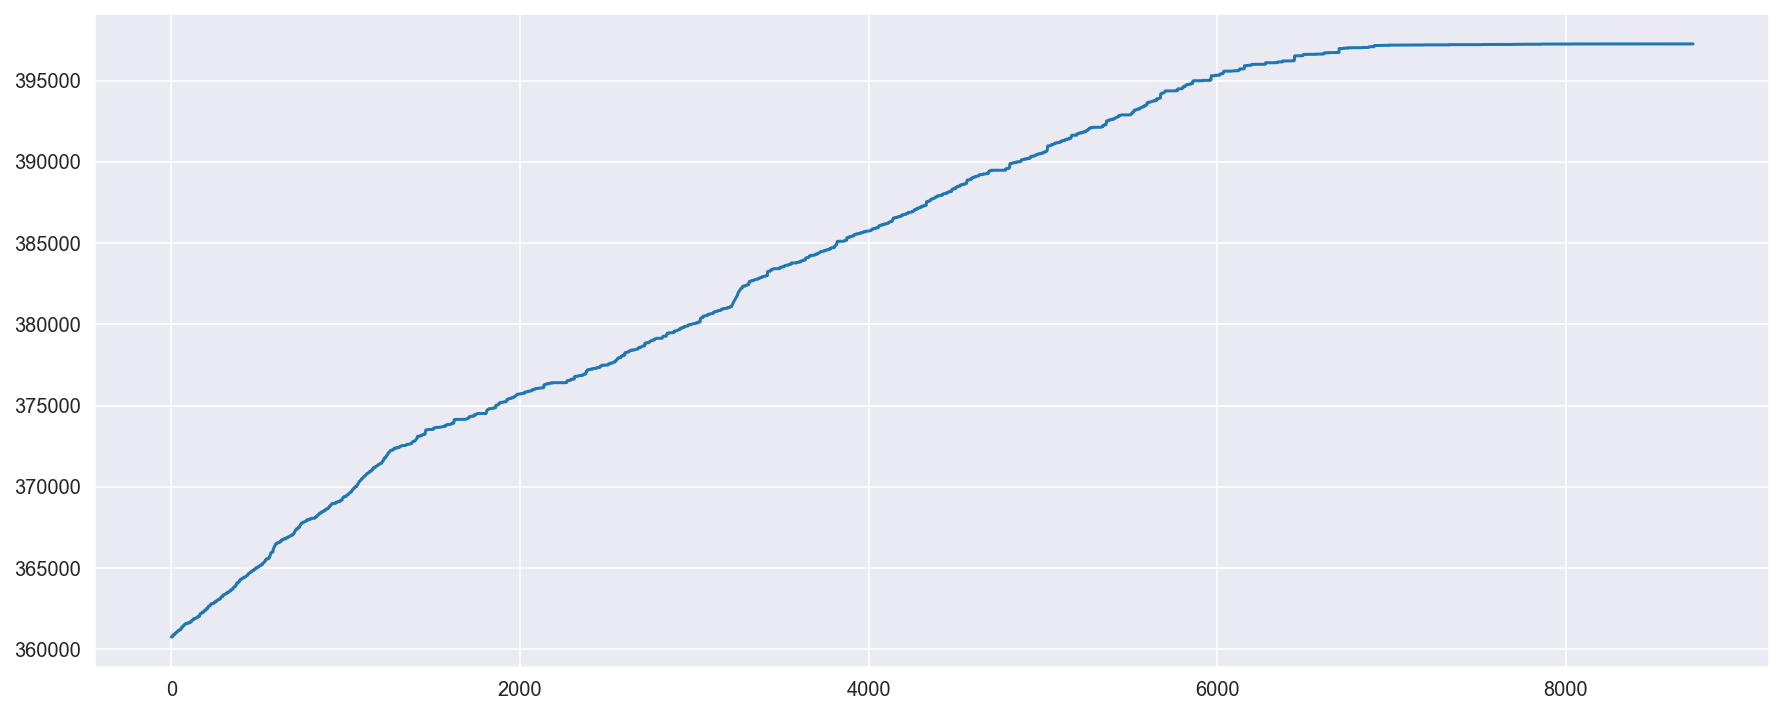

In [99]:
plt.plot(df.loc[1365].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

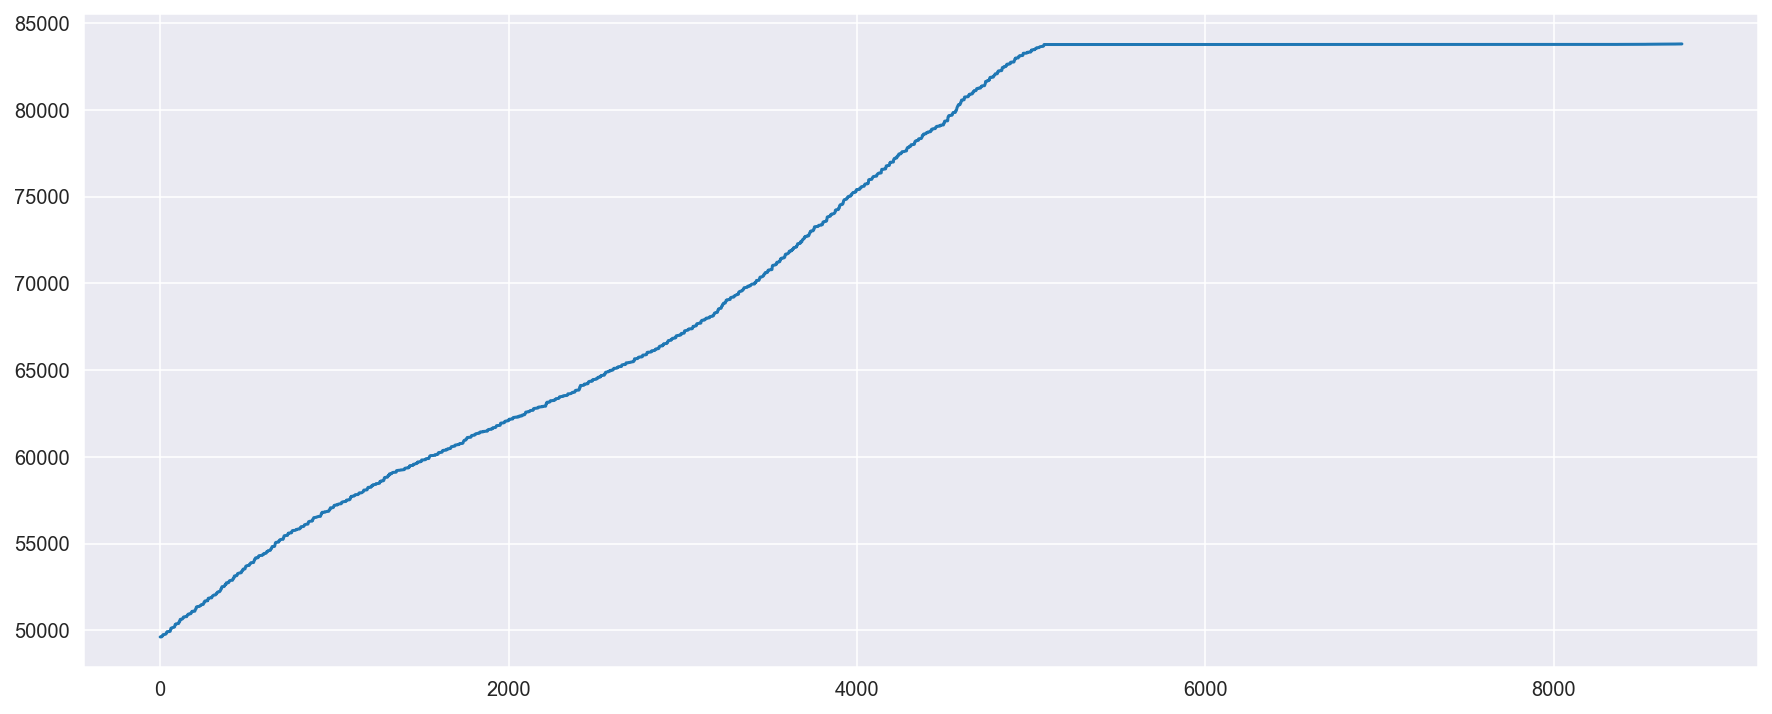

In [100]:
plt.plot(df.loc[1407].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

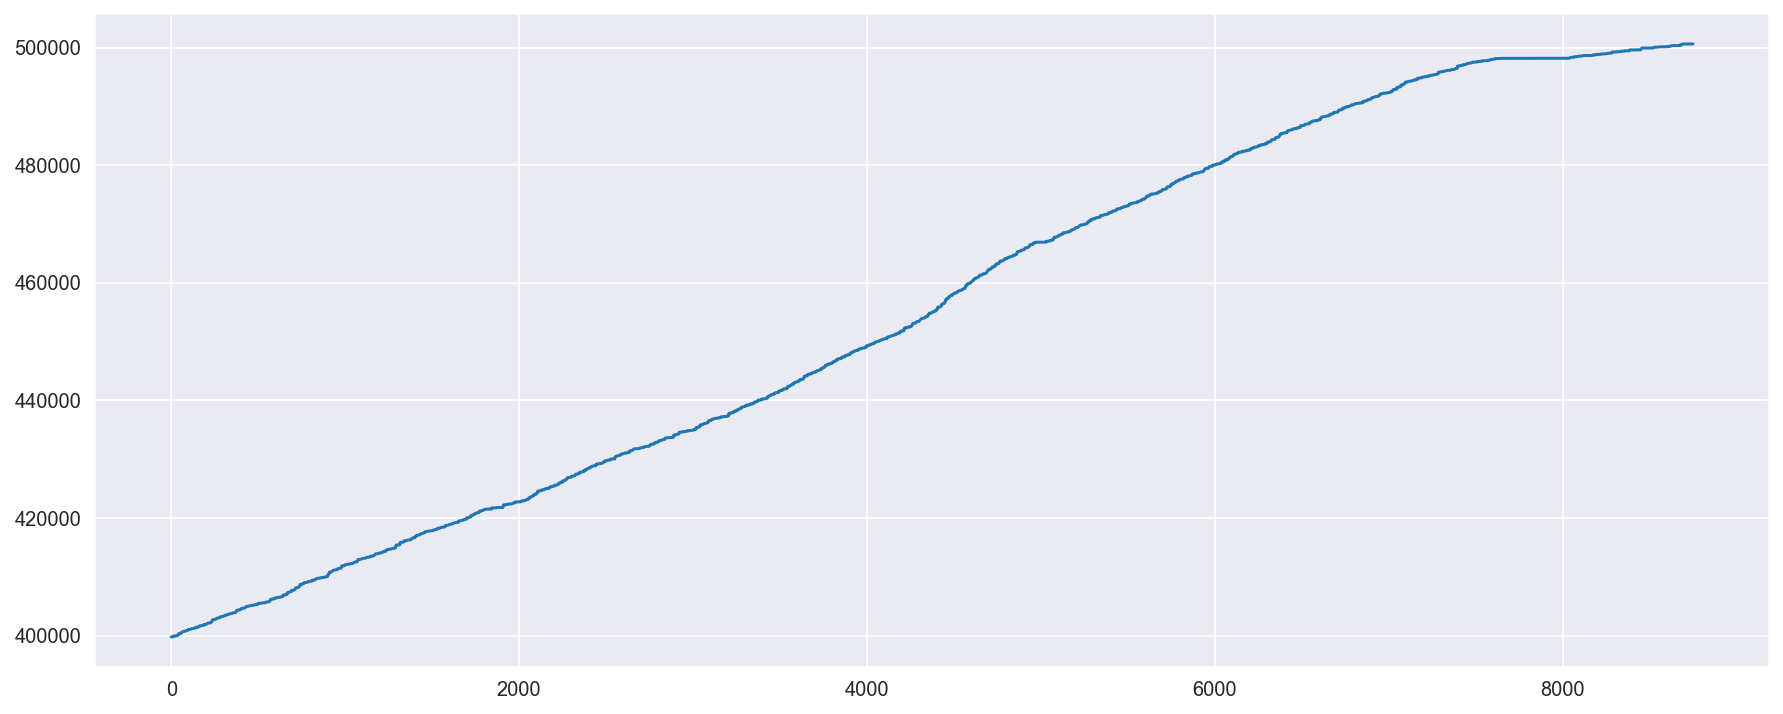

In [101]:
plt.plot(df.loc[1419].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

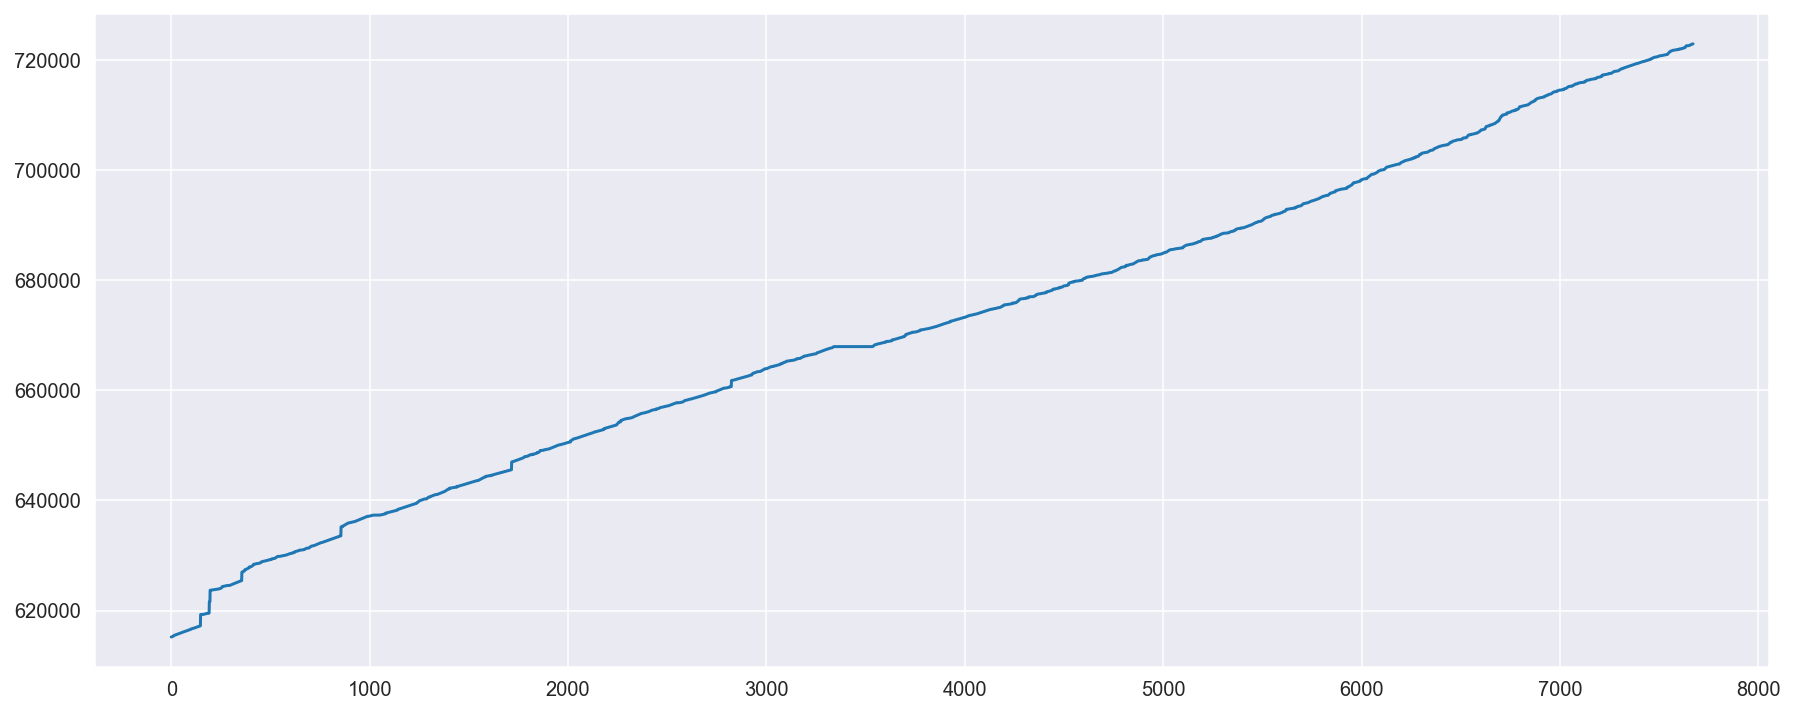

In [102]:
plt.plot(df.loc[1537].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

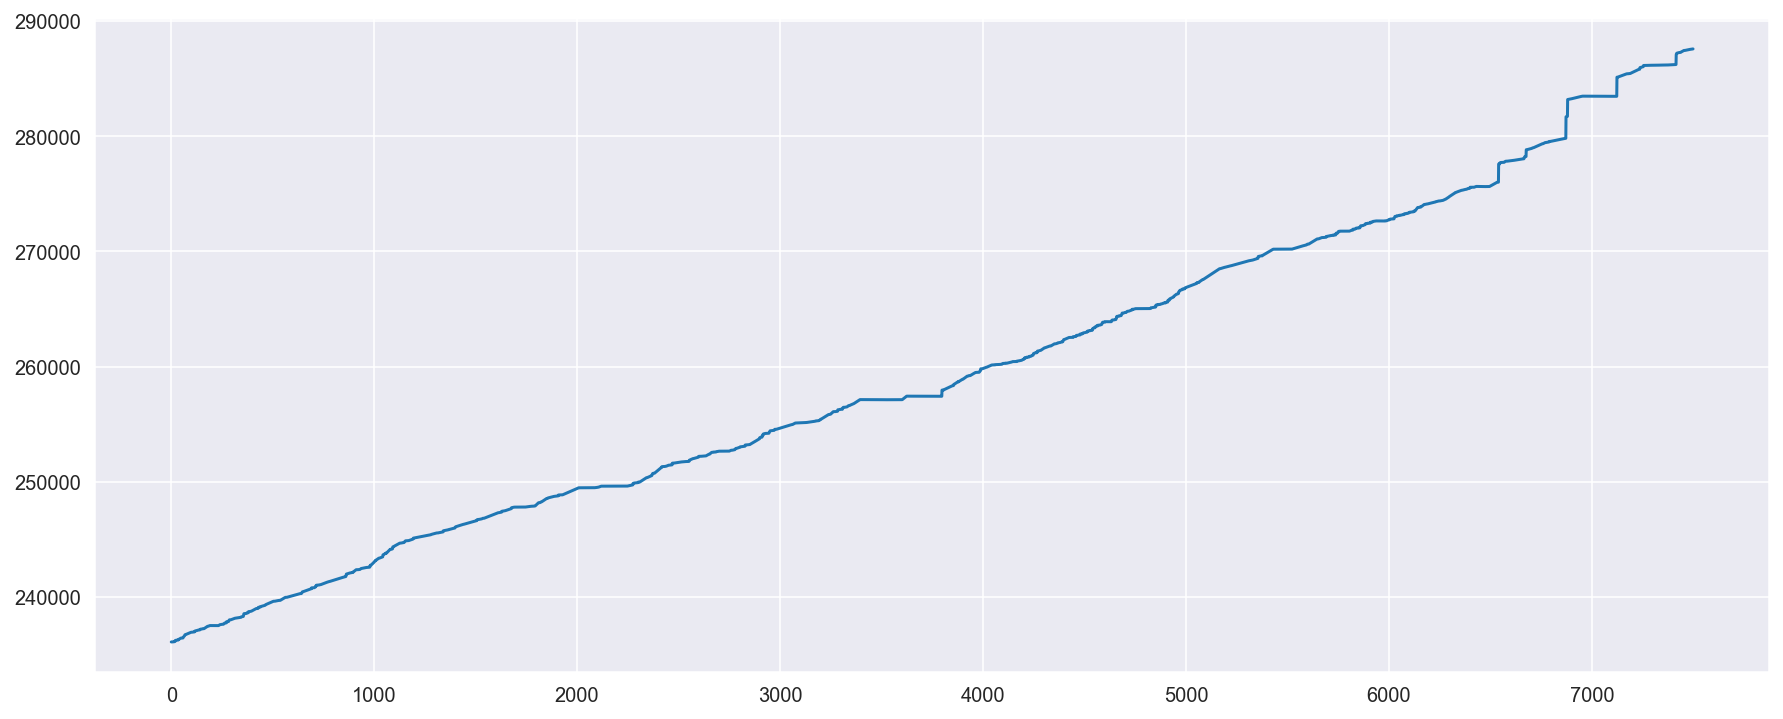

In [103]:
plt.plot(df.loc[1663].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

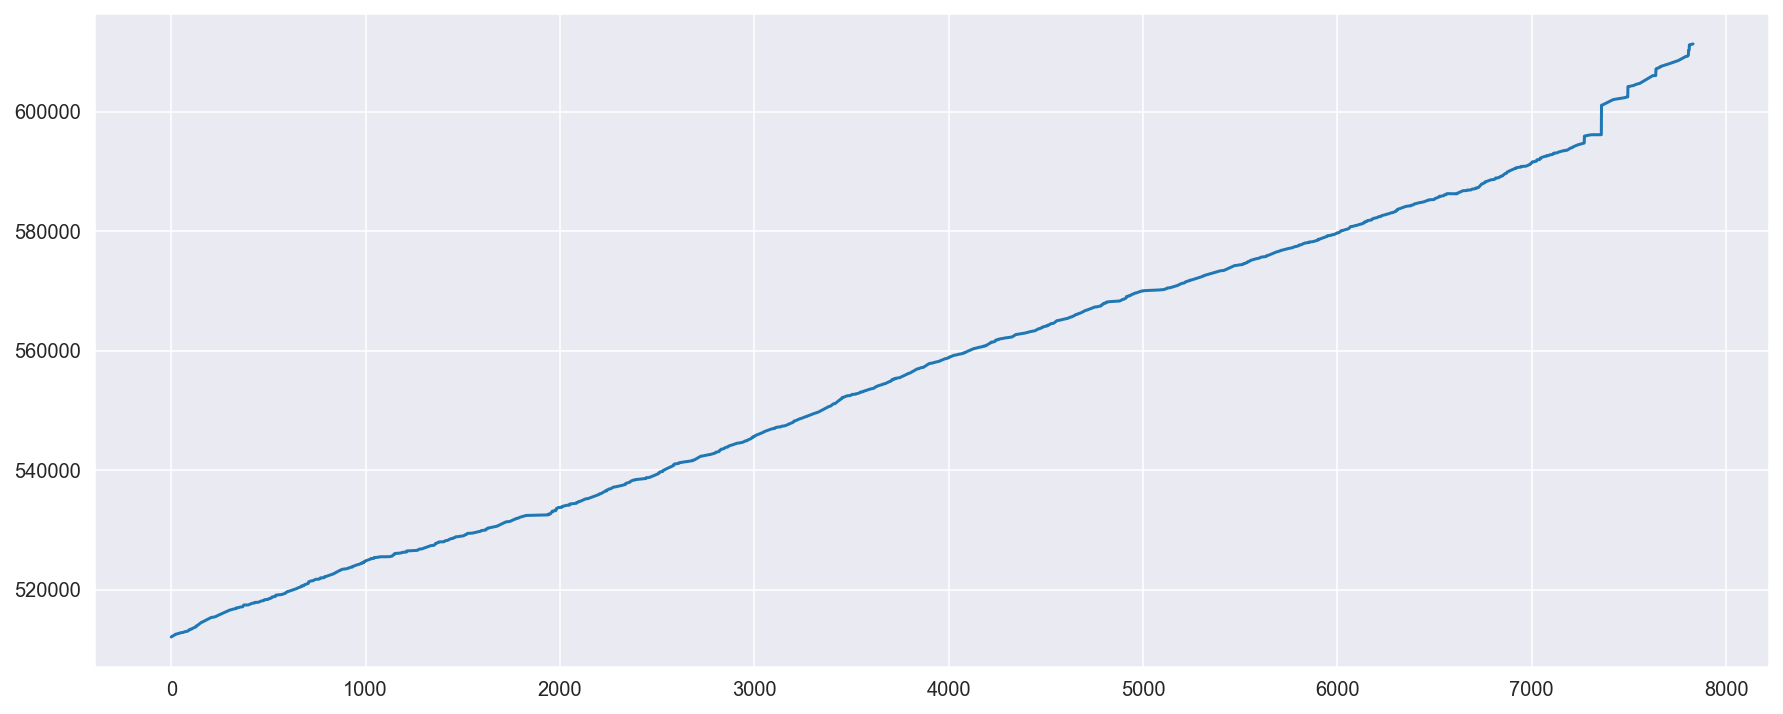

In [105]:
plt.plot(df.loc[1859].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

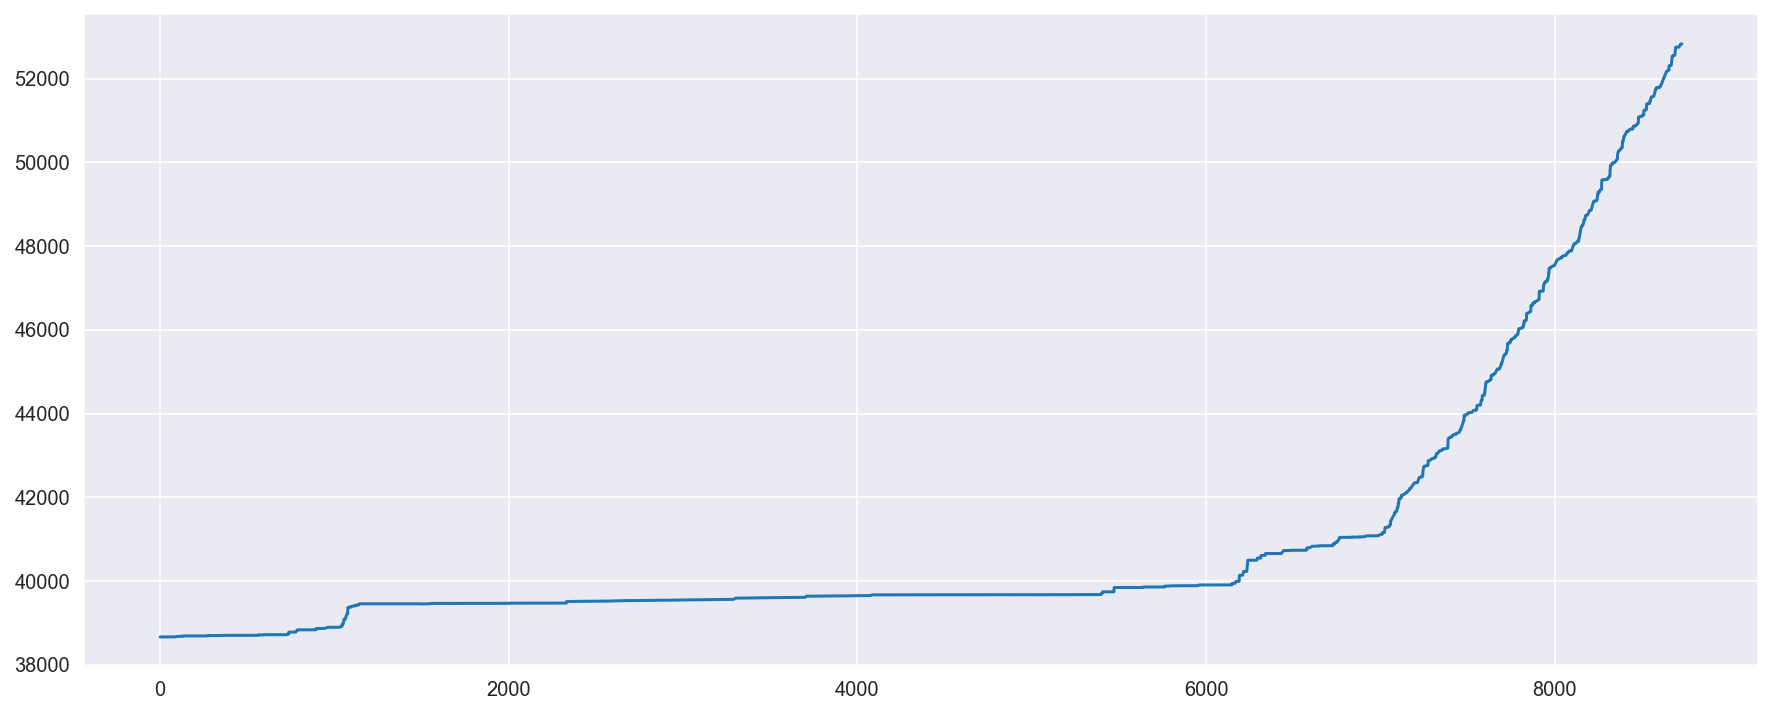

In [ ]:
plt.plot(df.loc[2316].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

¿O ni el inicio ni el final?

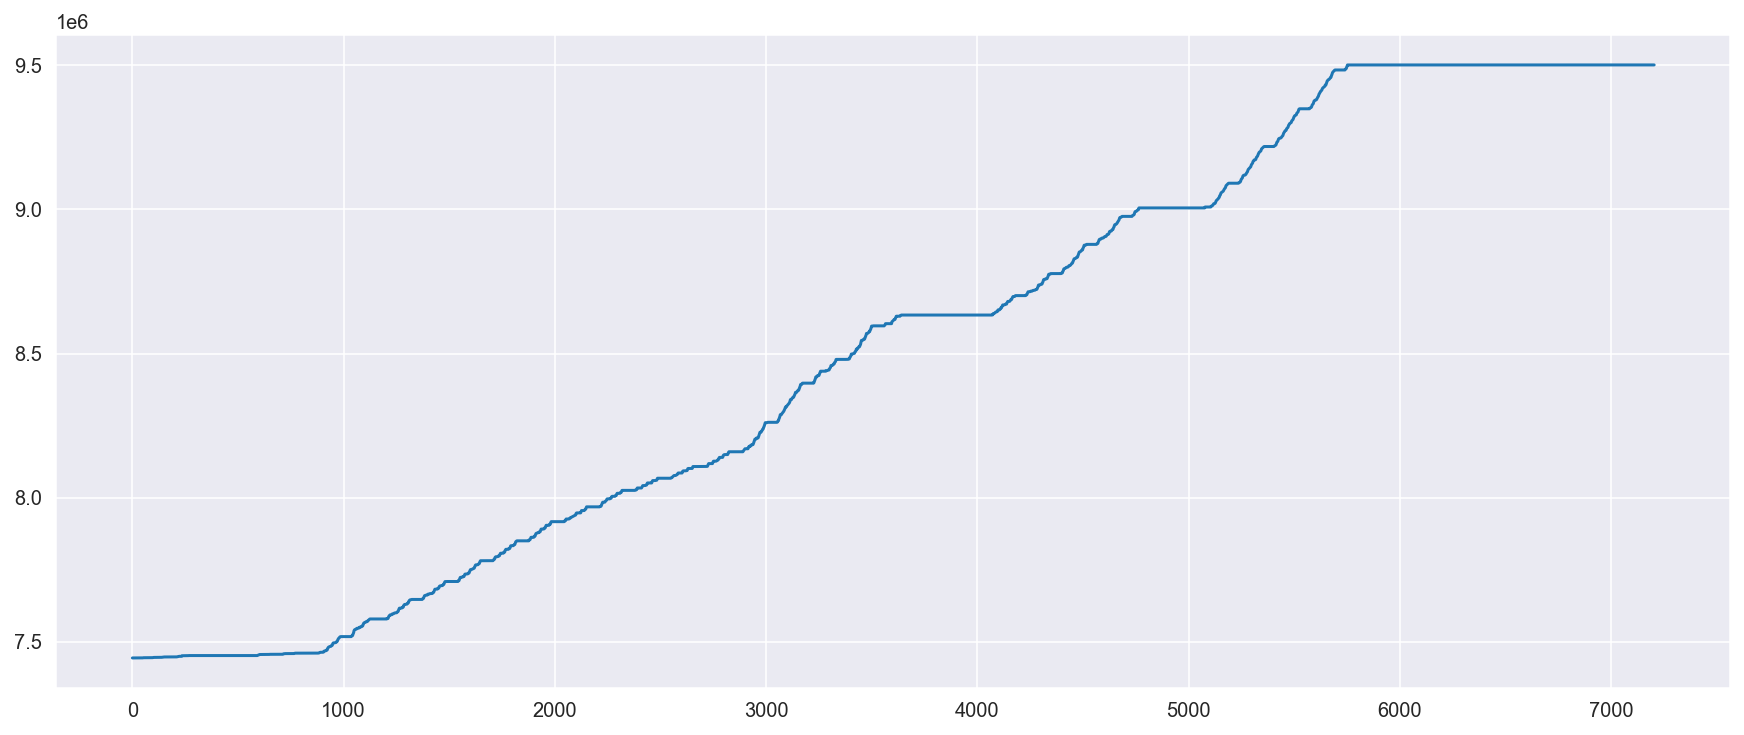

In [ ]:
plt.plot(df.loc[1679].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

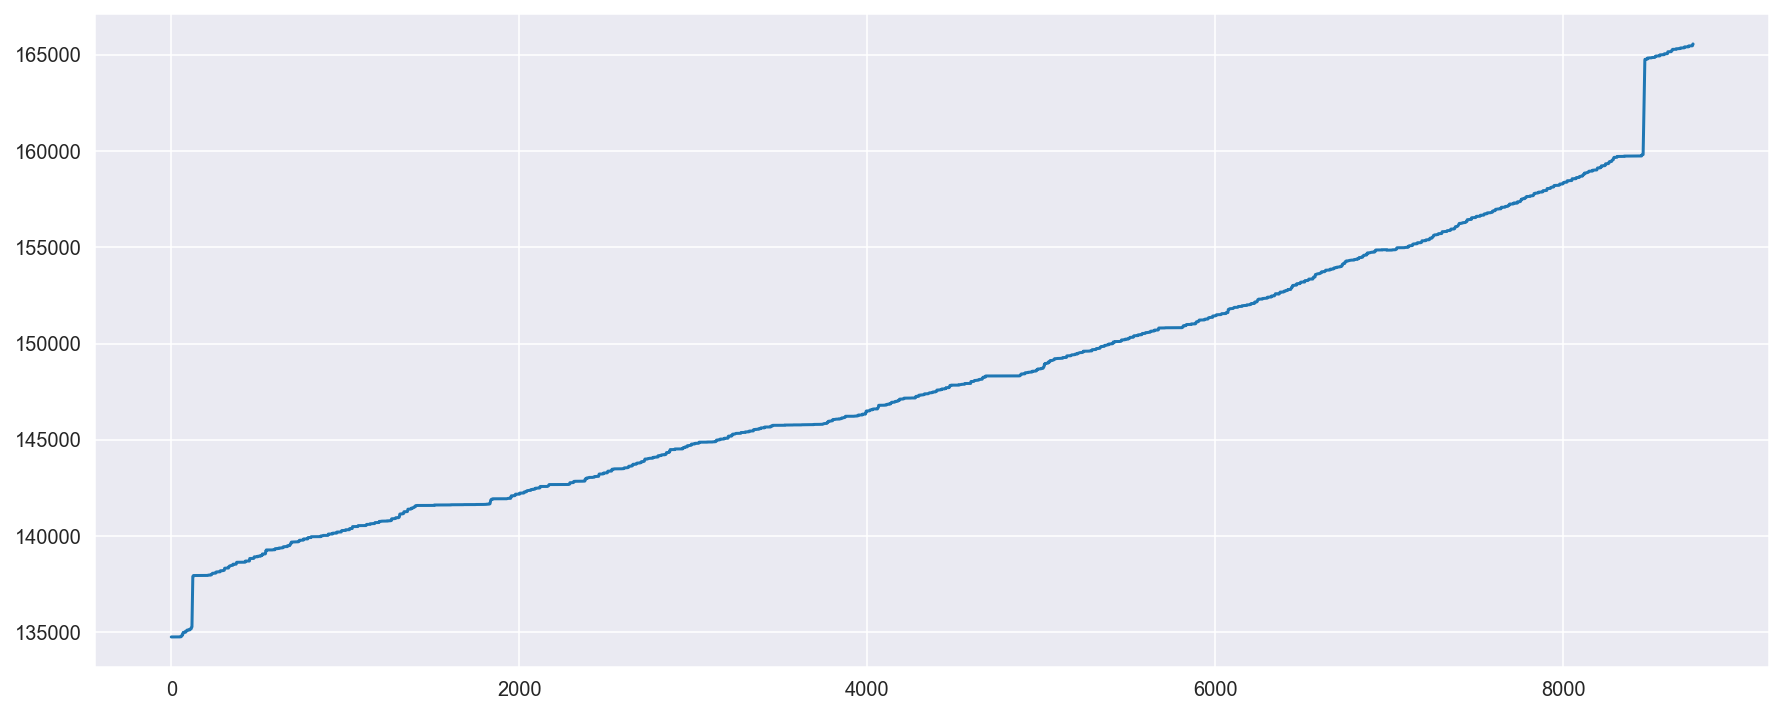

In [ ]:
plt.plot(df.loc[2021].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

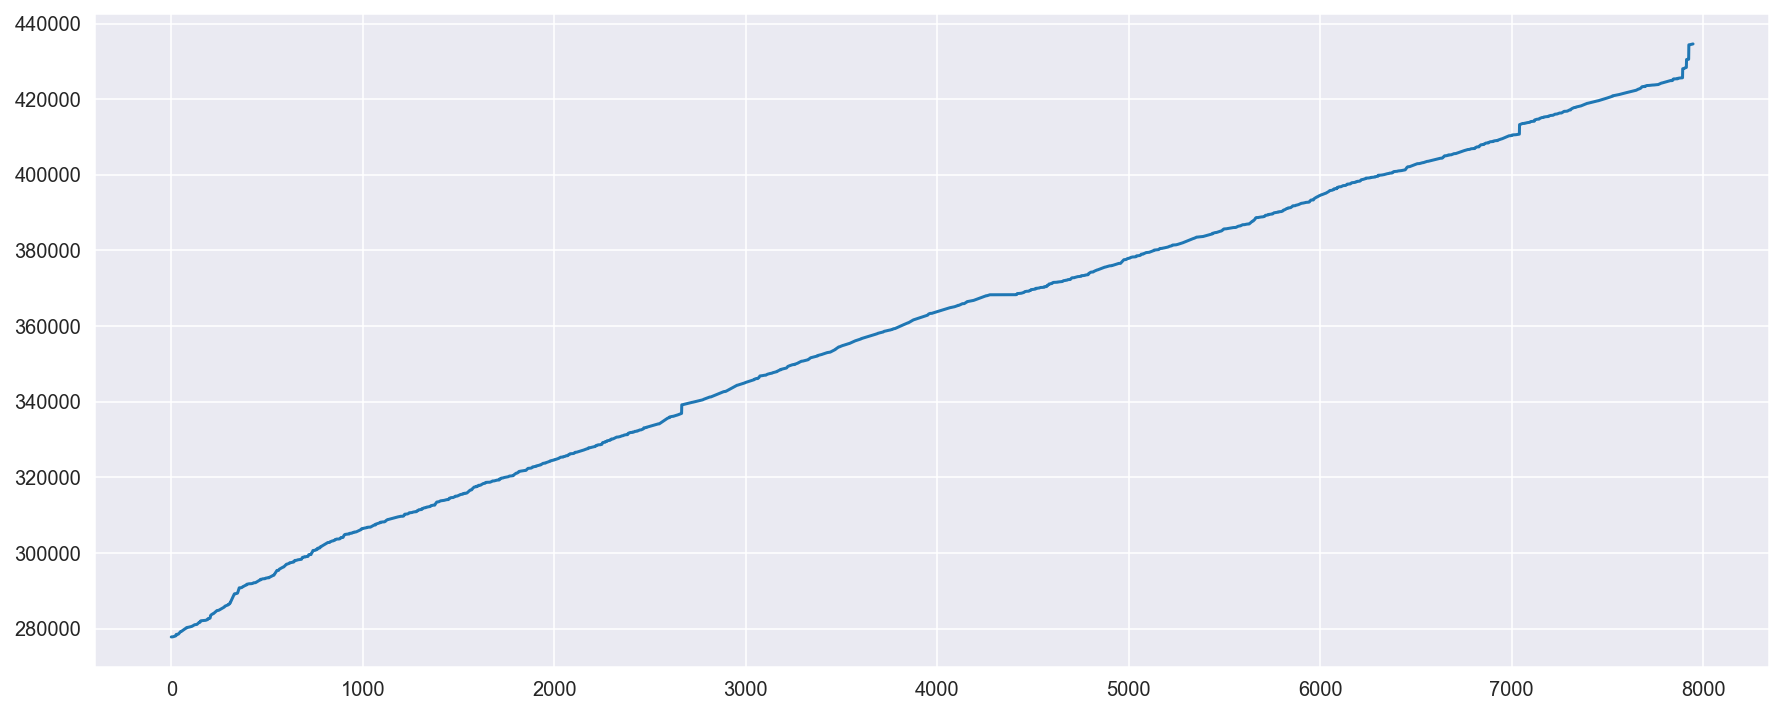

In [ ]:
plt.plot(df.loc[2214].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

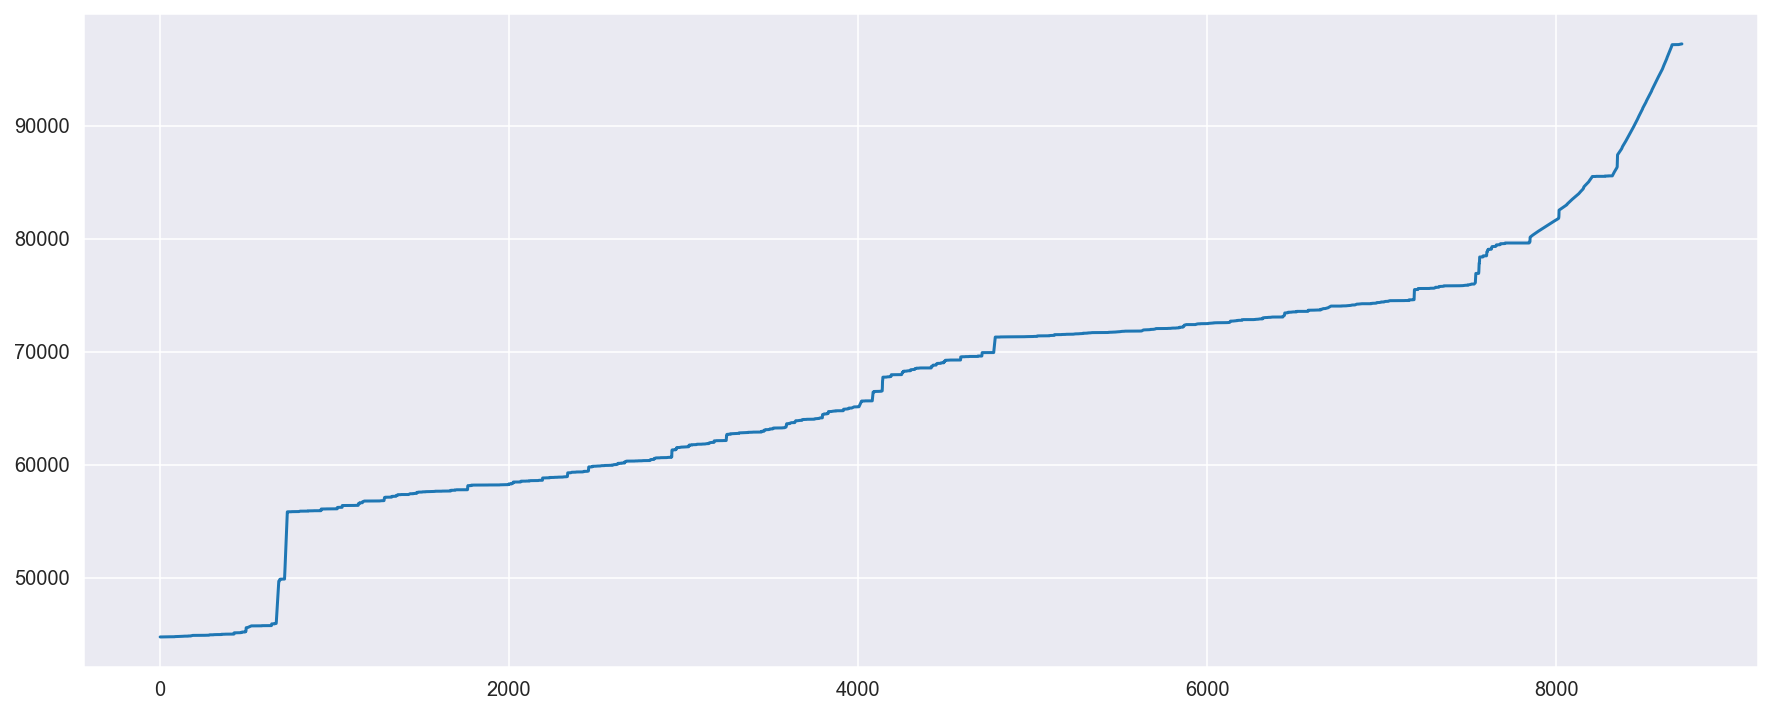

In [ ]:
plt.plot(df.loc[2235].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

### Corrección

Plan:
- Fase 1: Para cada valor que sea menor que el anterior, 
- Fase 2: 

In [192]:
# Para cada contador (índice)
for i in tqdm(df.index.drop_duplicates()):
    df_temp = df.loc[i]
        
    # Comprobamos uno por uno todos los valores comparándolos con el anterior
    for j in range(1,len(df_temp)):
        if df_temp.iloc[j]["READINGINTEGER"] < df_temp.iloc[j-1]["READINGINTEGER"]:
            
            new = 2 * (df_temp.iloc[j-1]["READINGINTEGER"] - df_temp.iloc[j]["READINGINTEGER"])
            
            df.loc[i].loc[df_temp['SAMPLETIME'] >= df_temp.iloc[j]["SAMPLETIME"],'READINGINTEGER'] = df_temp.loc[df_temp['SAMPLETIME'] >= df_temp.iloc[j]["SAMPLETIME"],'READINGINTEGER'] + new

  0%|          | 3/2738 [00:03<59:20,  1.30s/it]C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
100%|██████████| 2738/2738 [1:11:53<00:00,  1.58s/it]


In [193]:
df.to_csv('data/Modelar_Procesado_2.csv')

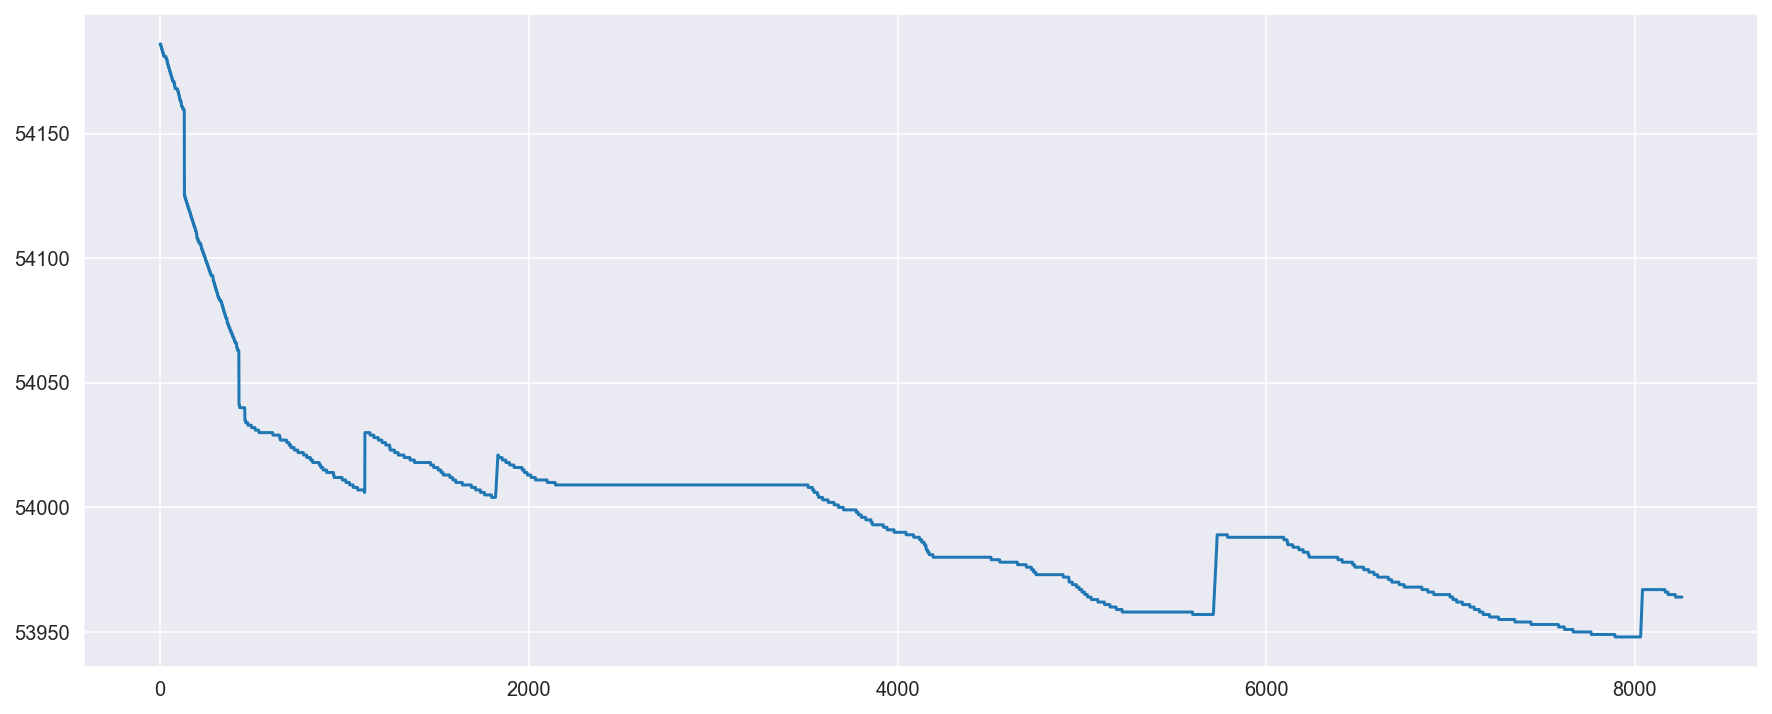

In [157]:
plt.plot(df_temp.loc[2140].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

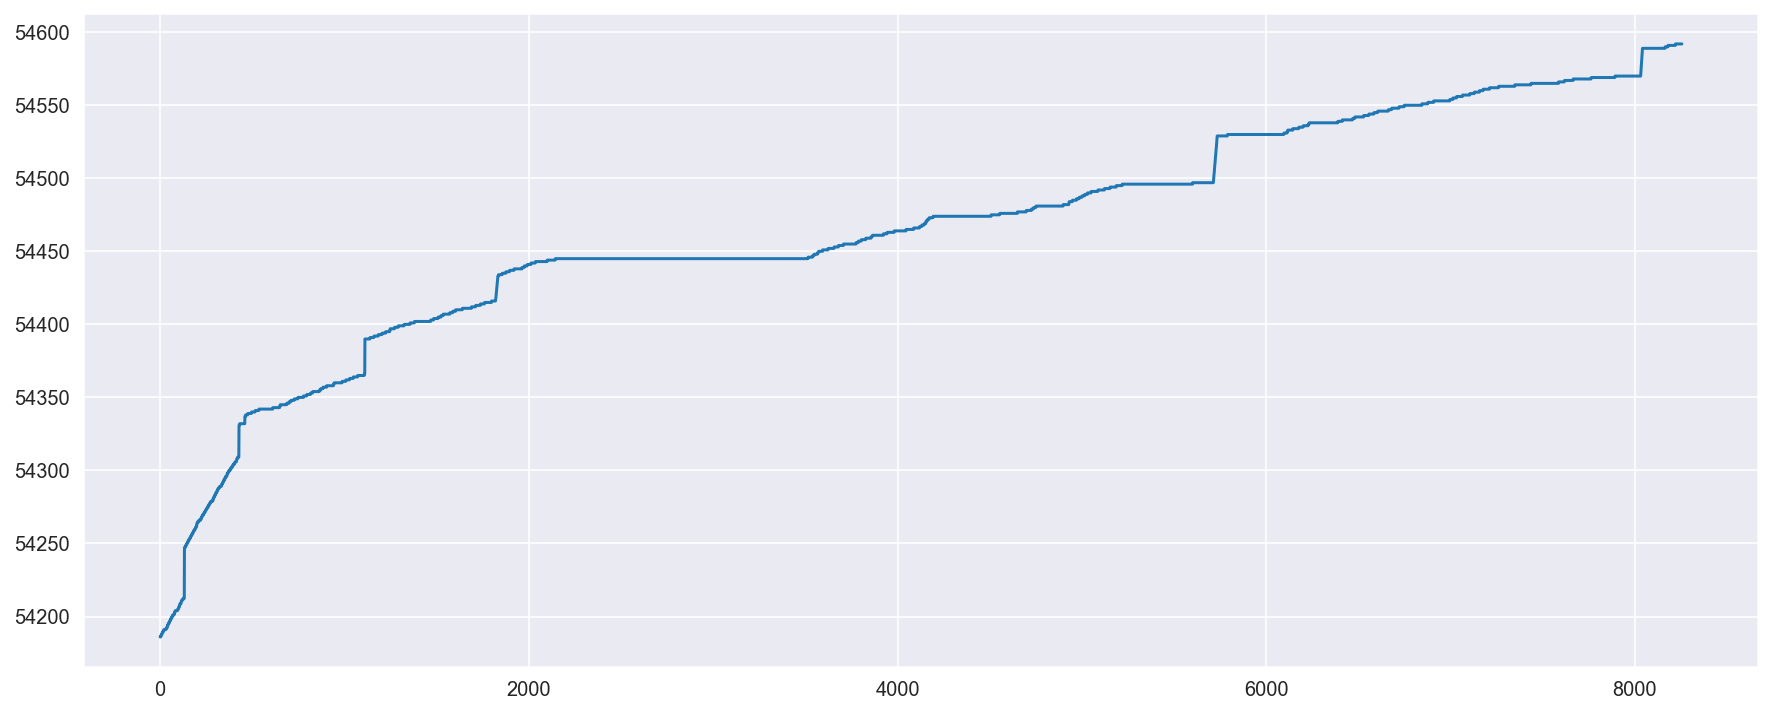

In [194]:
plt.plot(df.loc[2140].sort_values('SAMPLETIME')["READINGINTEGER"][:].values)

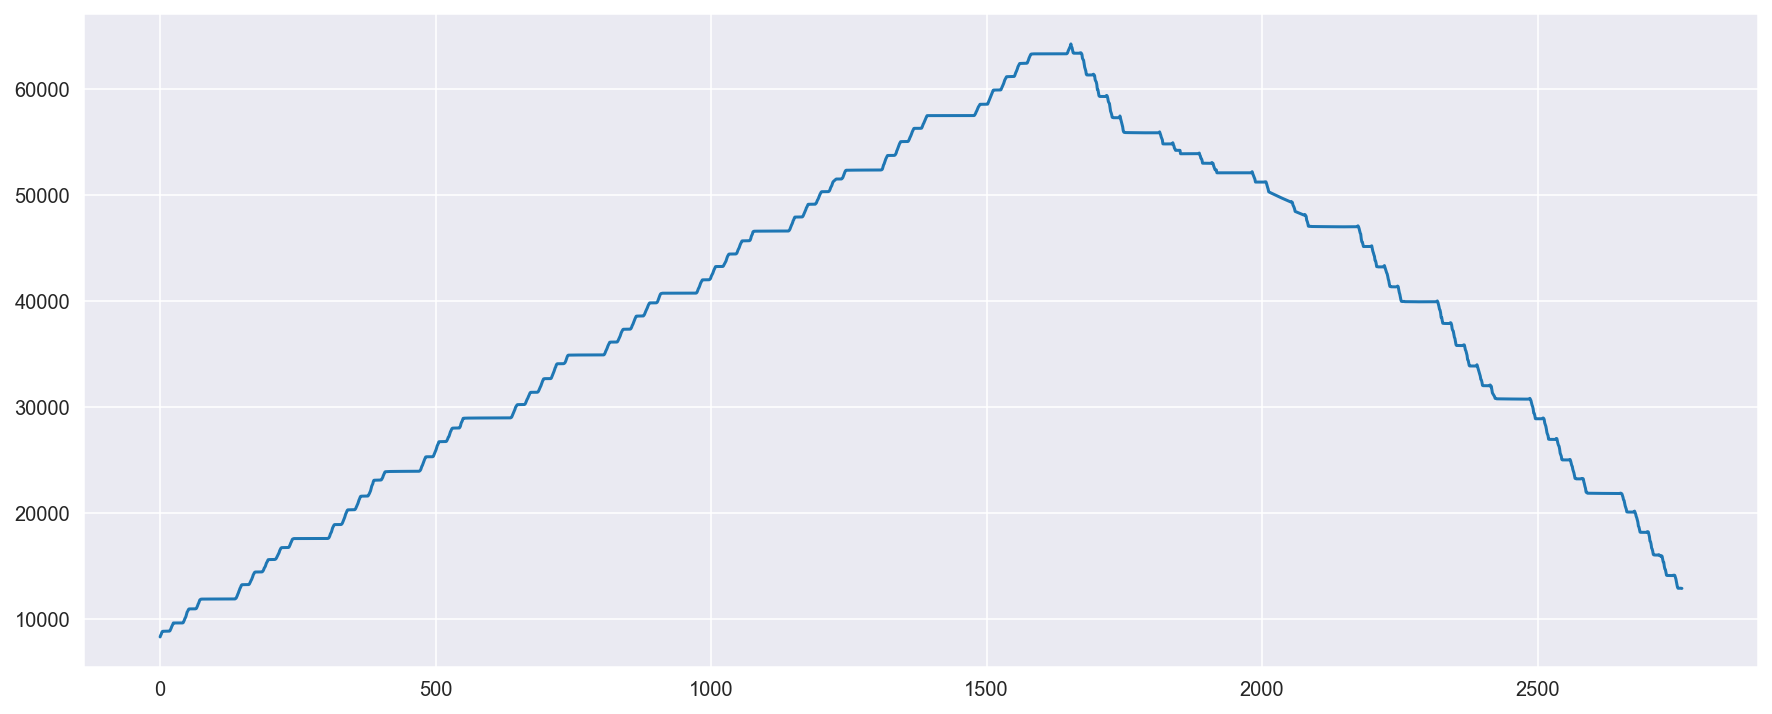

In [177]:
plt.plot(df.loc[2711].sort_values('SAMPLETIME')["READINGINTEGER"].values)

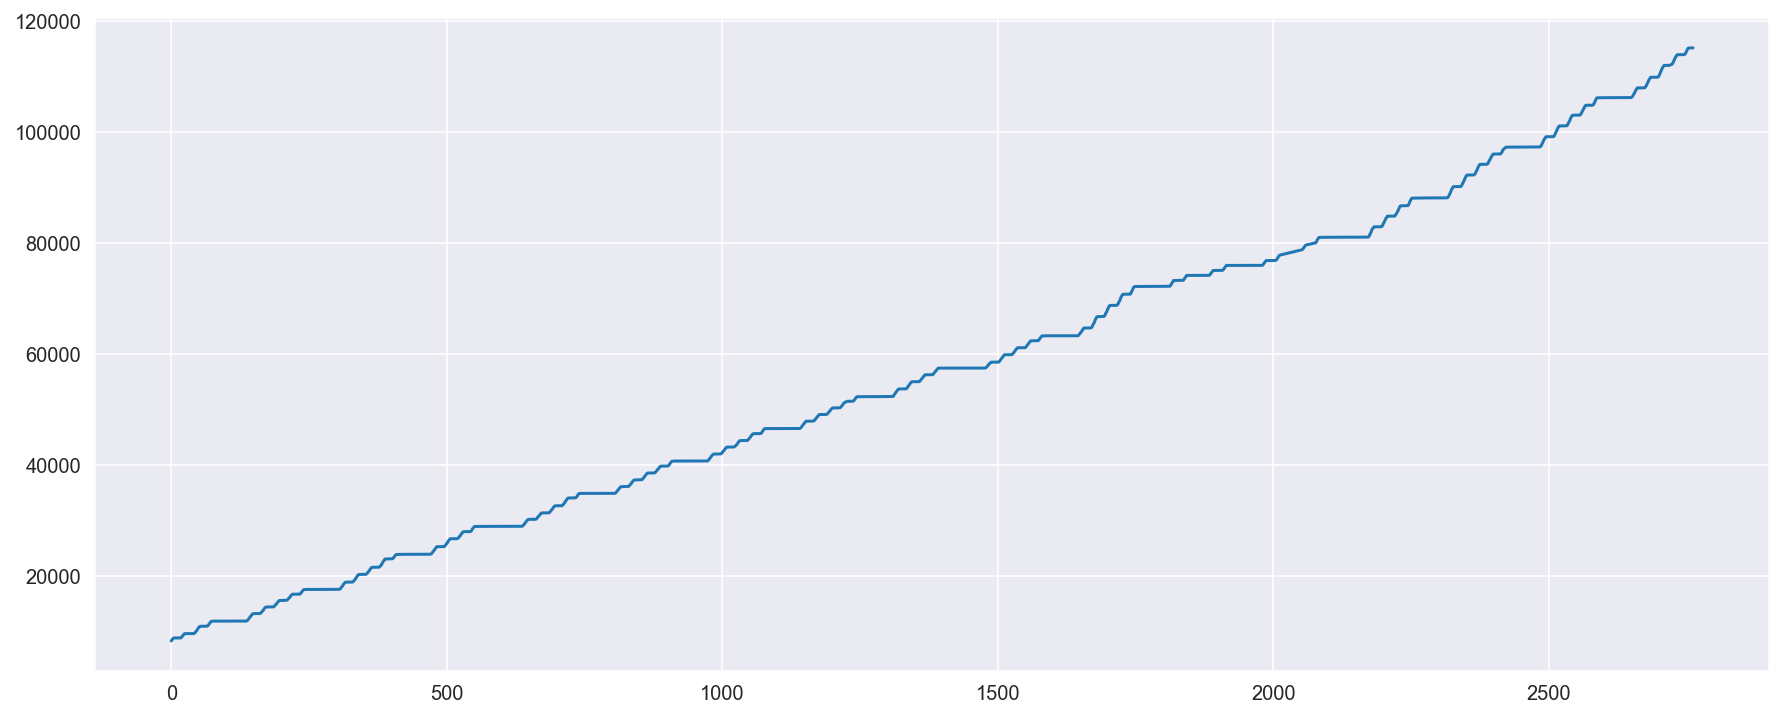

In [195]:
plt.plot(df.loc[2711].sort_values('SAMPLETIME')["READINGINTEGER"].values)

Problema:

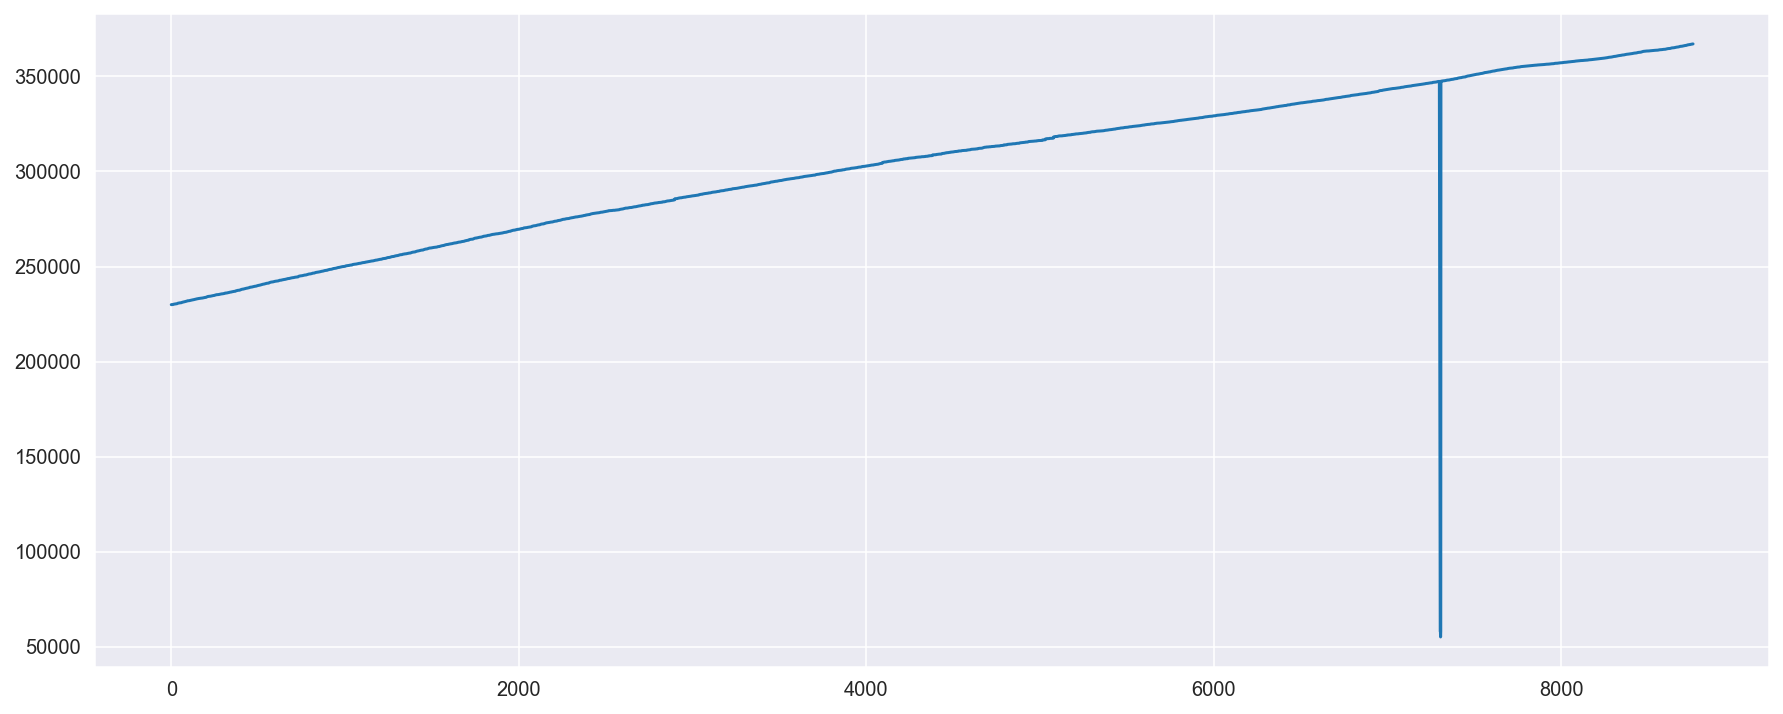

In [191]:
plt.plot(df.loc[57].sort_values('SAMPLETIME')["READINGINTEGER"].values)

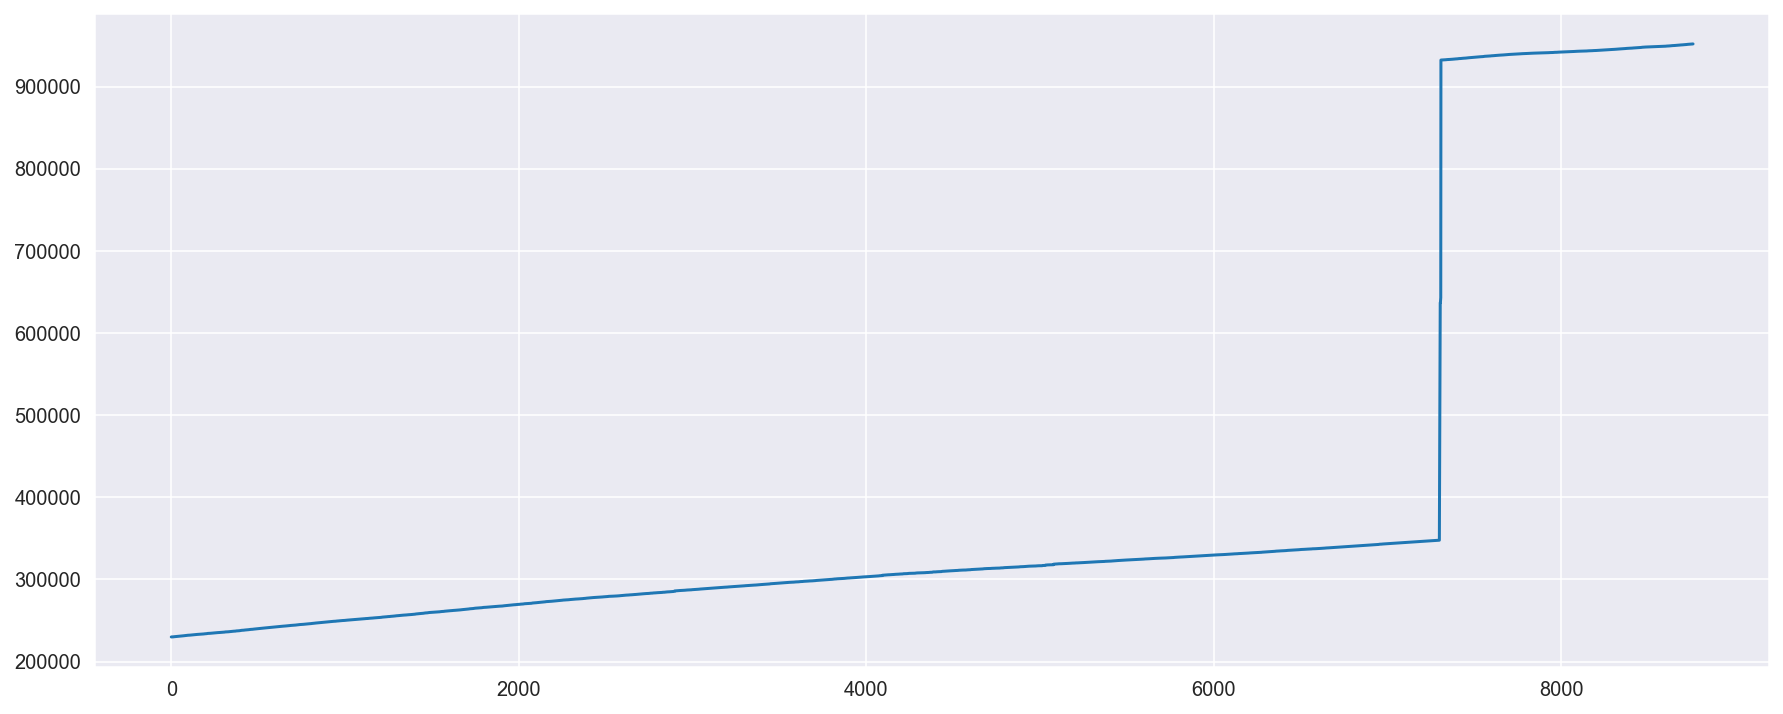

In [196]:
plt.plot(df.loc[57].sort_values('SAMPLETIME')["READINGINTEGER"].values)